# CSCI E-25      
## Working with Image Data  
### Steve Elston

## Introduction   

This lesson will familiarize you with the basic concepts of working with image data and some statistical properties of images. Some key points are of this lesson are:     
1. Discrete pixel structure of digital images.    
2. Representation of color and gray scale images.   
3. Intensity distribution of image data.
4. Equalizing intensity distributions and improving contrast. 
5. Sampling, aliasing and resizing images.


## Importing Packages

As a first step, you will now import the required Python packages. 

> **Scikit-Image:** In this lesson, and for much of the rest of this course, we will be using the Scikit-Learn Image package. This package provides many commonly used computer vision algorithms using a consistent Python API. This package follows the API conventions of Scikit-Learn, enabling the application of a rich library of machine learning algorithms. There is excellent documentation available for the [Scikit-Learn Image package](https://scikit-image.org/docs/stable/index.html). You may wish to start by reading through the [User Guide](https://scikit-image.org/docs/stable/user_guide/). Examples of what you can do with Scikit-Learn Image package can be seen in the [Examples Gallery](https://scikit-image.org/docs/stable/auto_examples/index.html).    
>
> **Scikit-Image and Numpy:** Like all Scikit packages Scikit-Image is built on [Numpy](https://numpy.org/). If you are not very familiar with Numpy there is an ReviewOfLinearAlgebra Jupyter notebook under the SuplementaryMaterial directory in the course GitHub repository, or you can find Tutorials [here](https://numpy.org/numpy-tutorials/). A tutorial on using Numpy with Scikit-learn image data objects can be found [here](https://scikit-image.org/docs/stable/user_guide/numpy_images.html).
>
> **Open CV2:** is a massive and widely used computer vision package. Open CV2 has an unmatched selection of classical computer vision algorithms. If you cannot find an image transformation or filter that you need in Scikit-Learn Image searching Open CV2 is a good option. For this course we prefer Scikit-Learn Image since the package design and documentation following the Scikit standards, making it beginner friendly. Design and quality of documentation of Open CV can be quite variable and difficult to master for beginners.        

To run the code in this notebook you will need to have Scikit-Image and Open CV2 installed in your environment. 

If you do not have Scikit-Image installed, you can uncomment and execute the code in the cell below. You can find [full installation instructions for Scikit-Image here](https://scikit-image.org/docs/stable/user_guide/install.html). 

If you do not have Open CV2 installed, you can uncomment and execute the second line of code in the cell below. You can find the [full installation instructions for Open CV2 here](https://github.com/opencv/opencv-python). 

> **Package compatibility:** Older versions of Open CV2 are  not compatible with with Numpy version $> 2$. Depending on your environment you may need to uninstall Numpy $>2.0$, and install Numpy $<2$ by uncommenting and executing the last two lines of code below.     

In [3]:
!pip install scikit-image
!pip install opencv-python
!pip uninstall numpy -y
!pip install "numpy<2"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 1.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 2.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: pip install --upgrade pip
Found existing installation: numpy 2.4.2
Uninstalling numpy-2.4.2:
  Successfully uninstalled numpy-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 2.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to b

In [7]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.4 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.4 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)

[notice] A new release of pip is available: 25.0 -> 26.0
[notice] To update, run: pip install --upgrade pip


To get started with this lesson, execute the code in the cell below to import the packages you will need. `

In [13]:
import skimage 
from skimage import data
from skimage.filters.rank import equalize, threshold
import skimage.filters as skfilters
from skimage import exposure
from skimage.morphology import disk, square
from skimage.color import rgb2gray, rgb2ycbcr, ycbcr2rgb, rgb2xyz, xyz2rgb, rgb2yuv, yuv2rgb, rgb2hsv, hsv2rgb
from skimage.measure import block_reduce
from skimage.transform import resize
from skimage.util import img_as_ubyte
import numpy as np
import numpy.random as nr
from PIL import Image
from scipy import signal
import cv2 as cv
import sklearn
from sklearn.preprocessing import MinMaxScaler 
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Structure of a Color Image Object

The code in the cell below loads a color image of a human retina, prints the data types and dimensions of the image object, and displays the image. The image is displayed by [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Execute the code and examine the result.

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (1411, 1411, 3)


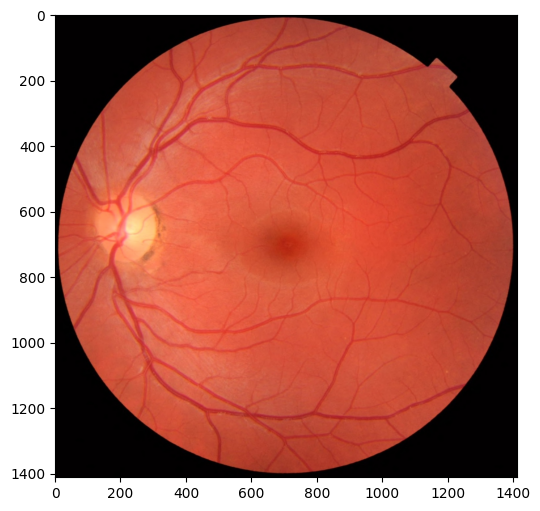

In [5]:
retina_image = data.retina()
print('The image object is ' + str(type(retina_image)))
print('The pixel values are of type ' + str(type(retina_image[0,0,0])))
print('Shape of image object = ' + str(retina_image.shape))
fig, ax = plt.subplots( figsize=(6, 6))
_=ax.imshow(retina_image)

The image object has 3-dimensions, the two spatial dimensions and the 3 color channels. Examine this image noticing the wide variation in color and intensity. Notice also that the illumination of the retina does not appear uniform, resulting in a bright spot on the left and a darker region on the right.  

> **Exercise 1-1:** Complete the code for the function in the cell below to display the 3 RGB color channels of the image and the original image in a 2x2 array using the [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function. The color channels are in red, green, blue order and should be displayed as gray scale using the `cmap=plt.get_cmap('gray')` argument. Your function should label the channels and the original image. Execute your function and examine the results.    

(1411, 1411, 3)
uint8 0 255


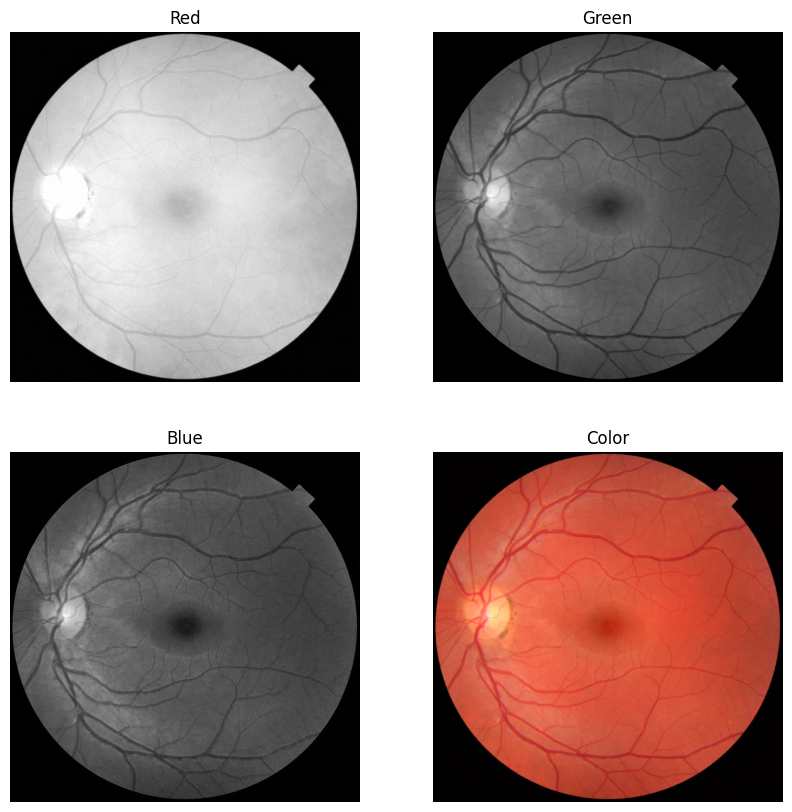

In [6]:
def plot_3_color_channels(img, titles=['Red','Green','Blue','Color'], plot_image=True):
    '''Function plots the three color channels of the image along with the complete image'''
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    ax = ax.flatten()
    ## Complete the code below
    print( img.shape ) # ( height, width, channels )
    print(img.dtype, img.min(), img.max()) # checking intensity range

    # channels: RGB
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    channels = [ R, G, B, img ]
    
    # display the RGB channels and the original image
    for i in range(4):
        channel = channels[ i ]
        # ax[0].imshow( R, cmap='gray', vmin=0, vmax=255 ) # fixed intensity scaling (assumes uint8 image in [0, 255])
        if i > 2: # color img
            ax[i].imshow( channel )
        else:
            ax[i].imshow( channel, plt.get_cmap('gray') ) # auto scaling in case intensity is not [0, 255]
        ax[i].set_title(titles[i])
        ax[i].axis('off')
    
plot_3_color_channels(retina_image)    

> Examine the intensity (brightness) of the color channels and answer these questions in one or two sentences:    
> 1. Which channel has the greatest intensity, and does this make sense given the image?      
> 2. Is it likely that the saturation seen in the red channel arises as an artifact of the illumination spot on the left of the retina image?
> **End of exercise.**



In [7]:
R = retina_image[:, :, 0]
G = retina_image[:, :, 1]
B = retina_image[:, :, 2]

print("Mean intensity:")
print("Red:  ", R.mean())
print("Green:", G.mean())
print("Blue: ", B.mean())

Mean intensity:
Red:   159.4335144387949
Green: 63.54503418267224
Blue:  46.11541944657774


> **Answers:**     
>    1. The red channel has the greatest intensity (brightest) and this makes sense because the image is mostly red.    
>    2. Yes, the bright illumination spot on the left of the retina can disproportionately elevate red channel intensities.

When working with digital images it is always important to keep in mind the discrete nature of the samples. To demonstrate the discrete nature of a digital image you can visualize a 100 pixel, or $10 \times 10$, sample from the larger image by executing the code in the cell below. 

(10, 10, 3)
uint8 56 255


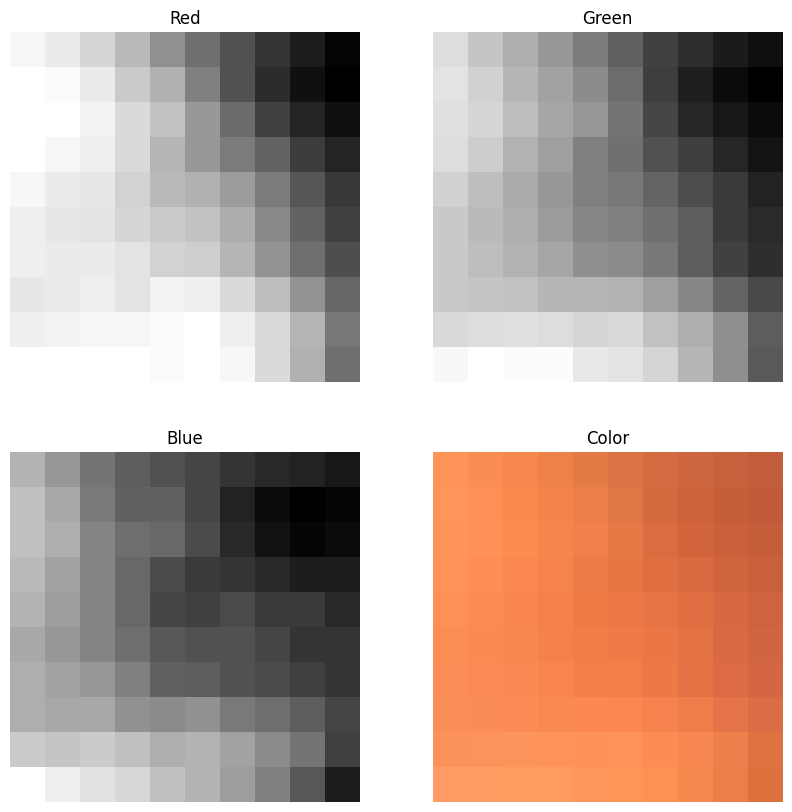

In [8]:
plot_3_color_channels(retina_image[600:610,300:310,:])

Notice the discrete nature in each of the three color channels and the color image. The sum of these discrete color-channel pixel intensities yields the color image.    

## Statistical Properties of an Image  

The next question is, what is the distribution of pixel intensities in the 3 color channels of the image? Histograms and cumulative density functions are used to analyze these distributions. The code in the cell below plots the histograms of the 3 color channels along with their cumulative distributions. Execute this code and examine the results.    

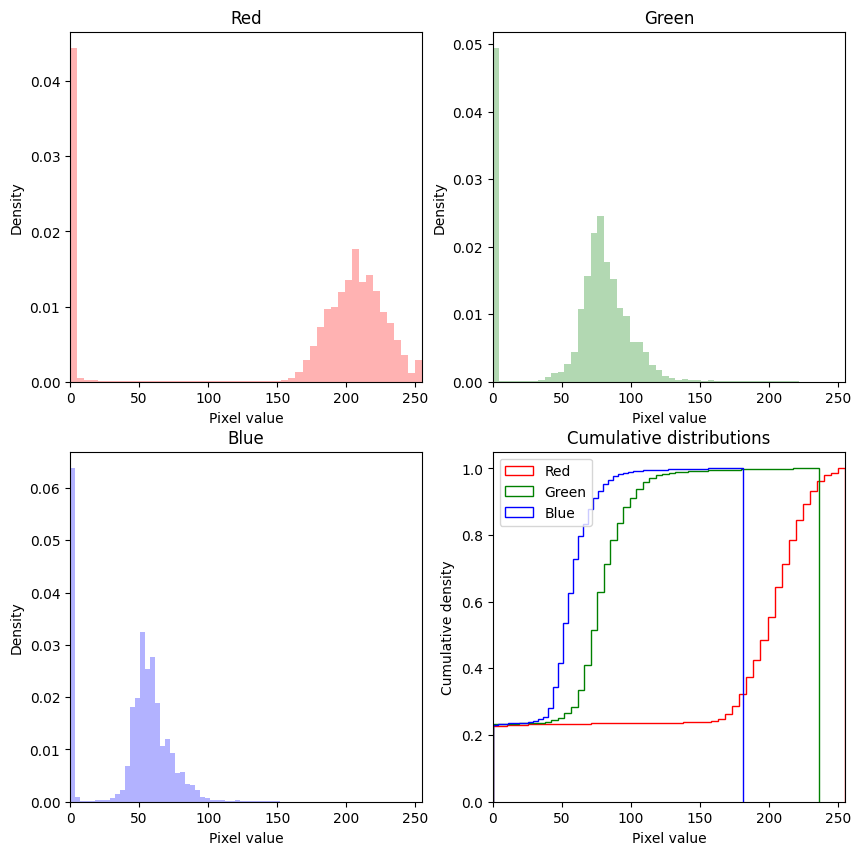

In [9]:
def plot_image_distributions(img, xlim=(0,255)):
    '''Function plots histograms of the three color channels of the image along 
    with the cumulative distributions'''
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    ax = ax.flatten()
    titles=['Red','Green','Blue']
    for i in range(3):
        ax[i].hist(img[:,:,i].flatten(), bins=50, density=True, color=titles[i], alpha=0.3)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Pixel value')
        ax[i].set_ylabel('Density')
        ax[i].set_xlim(xlim)
        ax[3].hist(img[:,:,i].flatten(), bins=50, density=True, cumulative=True, color=titles[i], histtype='step', label=titles[i])
        ax[3].set_xlim(xlim)
    ax[3].set_title('Cumulative distributions')  
    ax[3].set_xlabel('Pixel value')
    ax[3].set_ylabel('Cumulative density')  
    plt.legend(loc='upper left')
    
plot_image_distributions(retina_image)    

> **Exercise 1-2:** There are several properties of the distribution of the pixel values which are important. Examine the plots and provide one or two sentence answers to the following questions.         
> 1. The distribution of the intensity for of the red channel has clearly higher values than the other channels. Explain the relationship between these pixel values that give the colors seen in the original image?       
> 2. A significant fraction of pixel values have 0 intensity for all 3 color channels. To which part of the original image do these 0 pixels correspond?   
> 3. A few red channel pixels have the maximum value of 255. Where are these **saturated** pixel values seen on the original image? How will these saturated pixel values result in information loss when analyzing this image?           

> **Answers:**
> 1. The red channel has higher intensity values than the other color channels which makes sense since the original image had a more red/orange color. The pixel intensity is determined by the relative magnitudes of the 3 color channels and the dominance of the red channel would cause pixels to appear more red (with green and blue less so).      
> 2. The 0 intensity values would correspond to the black background (no light intensity).      
> 3. The saturated pixel values (value 255) occur in the bright illumination (white) spot on the left side of the image. These saturated pixel values can cause information loss when analyzing the image because it's difficult to differentiate the high intensity red regions in the image. In other words, it won't capture the accurate variation in high intensity red areas because all high intensity regions and the bright white spot will have the same intendity value of 255 (the threshold).    

## Improving Contrast     

Our next question to address is what is the ideal distribution of the intensity values of an image? A useful, and obviously answer, is that we want the pixel values over the full range of possible values. For unsigned integer values, {0,255}. Further, the distribution of pixel values should be uniform. For the $n=256$ unsigned integer values the **probability mass function**, or **PMF**, of the $ith$ value is:     

$$p(i) = \frac{1}{n}$$      

And the **cumulative density function**, or **CDF**, of the uniform distribution at the $ith$ value is, $x_i$:   

$$CDF(i) = \sum_{i=0}^{n-1} \frac{1}{x_i}$$  

We can visualize an example of a gray-scale image of unsigned integers on the range {0,255} with random uniform distributed pixel values. The code in the cell below forms a gray-scale image randomly sampled uniform distributed pixel values and displays the result.               

(1411, 1411)


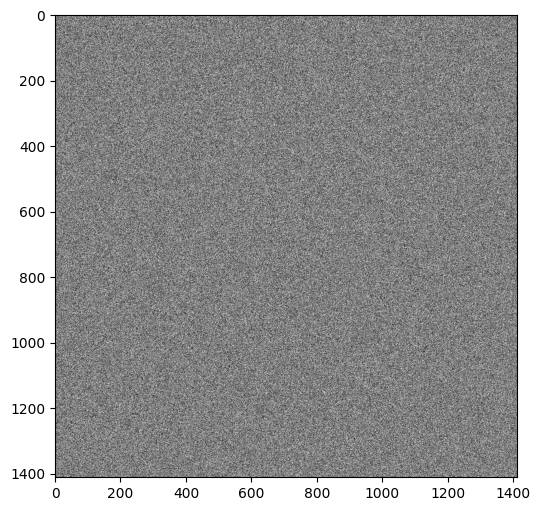

In [11]:
random_image = np.multiply((nr.uniform(low=0.0, high=255.0, size=retina_image.shape[0]*retina_image.shape[1])), 255).reshape((retina_image.shape[0], retina_image.shape[1]))
random_image = random_image.astype(np.uint8)
print(random_image.shape)
fig, ax = plt.subplots( figsize=(6, 6))
_=ax.imshow(random_image, cmap=plt.get_cmap('gray'))

To view the distribution of the pixel values of this image execute the code in the cell below. 

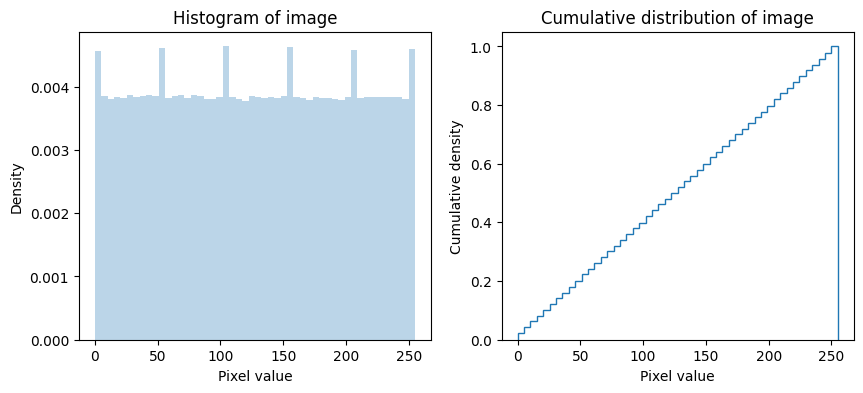

In [12]:
def plot_gray_scale_distribution(img):
    '''Function plots histograms a gray scale image along 
    with the cumulative distribution'''
    fig, ax = plt.subplots(1,2, figsize=(10, 4))
    ax[0].hist(img.flatten(), bins=50, density=True, alpha=0.3)
    ax[0].set_title('Histogram of image')
    ax[0].set_xlabel('Pixel value')
    ax[0].set_ylabel('Density')
    ax[1].hist(img.flatten(), bins=50, density=True, cumulative=True, histtype='step')
    ax[1].set_title('Cumulative distribution of image')  
    ax[1].set_xlabel('Pixel value')
    ax[1].set_ylabel('Cumulative density') 
    plt.show()

plot_gray_scale_distribution(random_image)    

> **Exercise 1-3:** To compare the pixel value distribution of the retina image to the ideal values do the following:   
> 1. Create a gray-scale image object named `retina_gray_scale` using the [skimage.color.rgb2gray](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html) function. 
> 2. Print the dimensions of the image object.  
> 3. Display the gray-scale image. Make sure the image is large enough to see the details.   
> 4. Plot the histogram and CDF of the pixel values of the gray-scale image. 

height:  1411 width:  1411


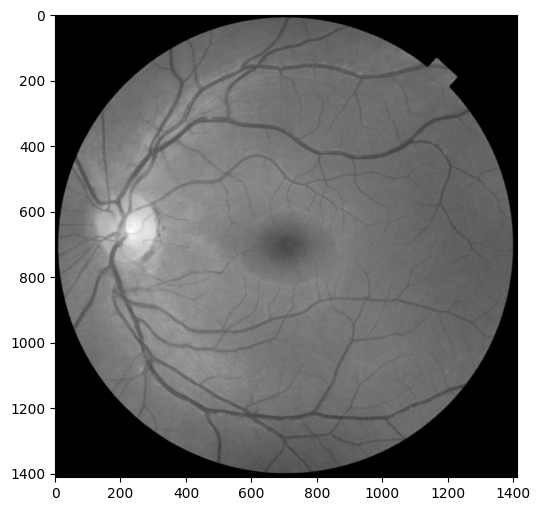

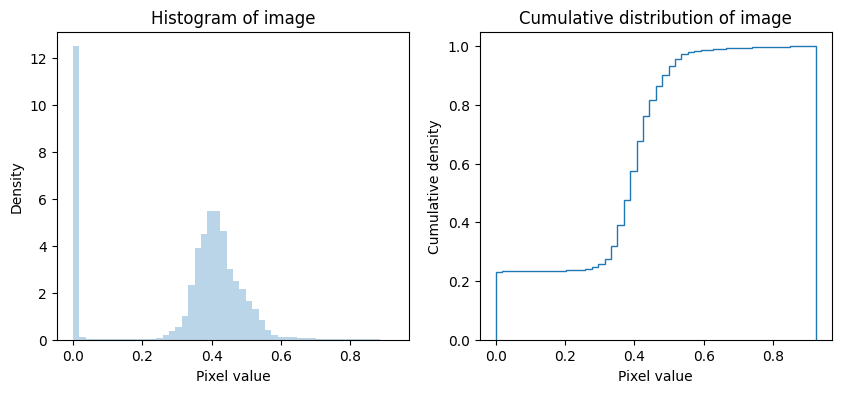

In [ ]:
def plot_grayscale(img):
    fig, ax = plt.subplots( figsize=(5, 5))
    _=ax.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()

## Put you code below 

# 1. gray scale image of retuina.
retina_image = data.retina()
retina_gray_scale =  rgb2gray( retina_image )

# 2. dimentions of image.
height, width = retina_gray_scale.shape
print( "height: ", height, "width: ", width )

# 3. display gray scale image.
fig, ax = plt.subplots( figsize=(6, 6))
_=ax.imshow( retina_gray_scale, plt.get_cmap('gray') )

# 4. plot histogram and CDF of pixel values of gray scale image.
plot_gray_scale_distribution( retina_gray_scale )


> Examine the distribution plots and answer these questions in one or a few sentences:  
> 1. How would you describe the distribution of pixel values with respect to the ideal distribution?    
> 2. How does the range of pixel values limit the contrast of the image?     
> **End of exercise.**

> **Answer:** 
> 1. Compared to the ideal distribution of pixel values, in the histogram, the pixel values for the gray scale image of the retina is less uniformly distributed and instead, its density is concentrated between pixel values 0.2 to 0.6 with the 0 pixel value density is highest (indicating the black background with no light). From the cumulative distribution graph, the ideal distribution is more linear whereas the gray scale retina image has a sigmoid curve.
> 2. Since the distribution of pixel values are clustered between around 0.2-0.6, a narrow range, rather than being spread uniformly from black to white (0-1), it will be hard to distinguish details in the image because the contrast is reduced.

## Histogram Equalization

**Contrast** of an image is range between the minimum and maximum pixel values of an image. The larger the range of values the more distinctive the differences in the image will be. To improve the contrast in an image we need to **equalize** the pixel values over the maximum of the range. The goal is to find a transformation that stretches the pixel values into a uniform distribution. This process is know as **histogram equalization**.    

Histogram equalization can be performed in a number of ways. The obvious algorithm is global histogram equalization. The pixel values are transformed to equalize the histogram across the entire image. However, if illumination is inconsistent across the image, global equalization will not be optimal. An alternative is to perform local histogram equalization over small areas of the image. This method is known as **adaptive histogram equalization**. Adaptive equalization can compensate for uneven illumination across the image.           

> **Exercise 1-4:** You will now apply both common types of histogram equalization to the gray-scale retina image. The code in the cell below uses both the [skimage.exposure.equalize_hist](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html) function and the [skimage.exposure.equalize_adapthist](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist) function. Additionally, the code tests different clip limits for the adaptive histogram equalization, $[0.01,0.02,0.1]$, and with a kernel size of $12 \times 12$. A clip limit of $0.01$ is the the default value. The code in the cell does the following for each function and arguments:    
> 1. Executes the equalization function passed as an argument. Pass the function name and arguments as strings using the Python [eval](https://www.w3schools.com/python/ref_func_eval.asp) function.  
> 2. Display the equalized gray-scale image using the `plot_grayscale()` function.   
> 3. Plot the distribution of the pixel values of the equalized gray-scale image using the `plot_gray_scale_distribution()` function.    
> 
> Execute the code in the cell below. 


For function equalize_hist 


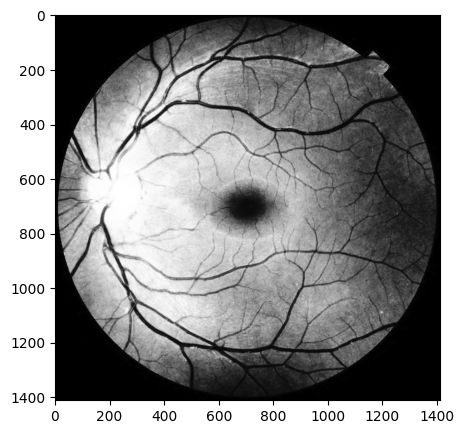

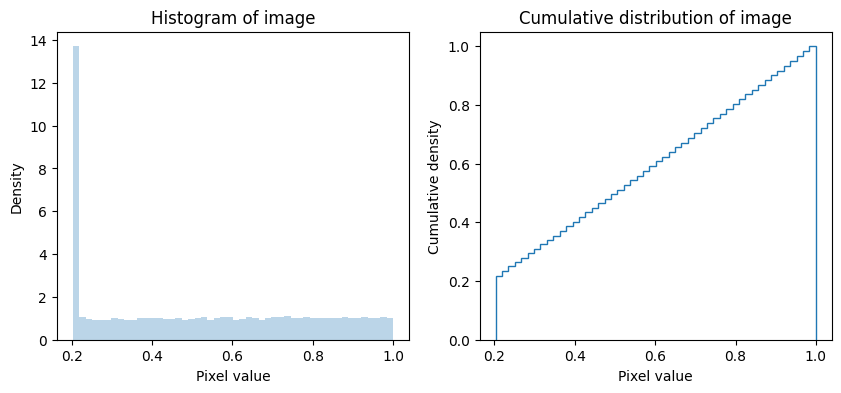


For function equalize_adapthist {"clip_limit": 0.01, "kernel_size": 12}


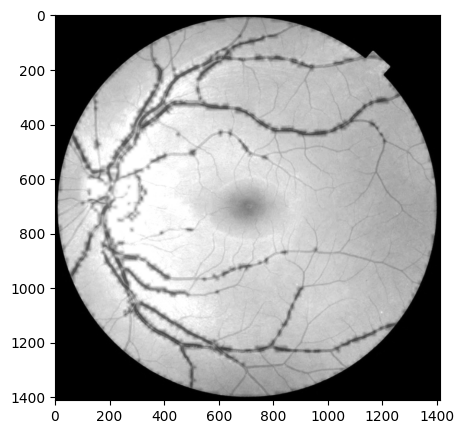

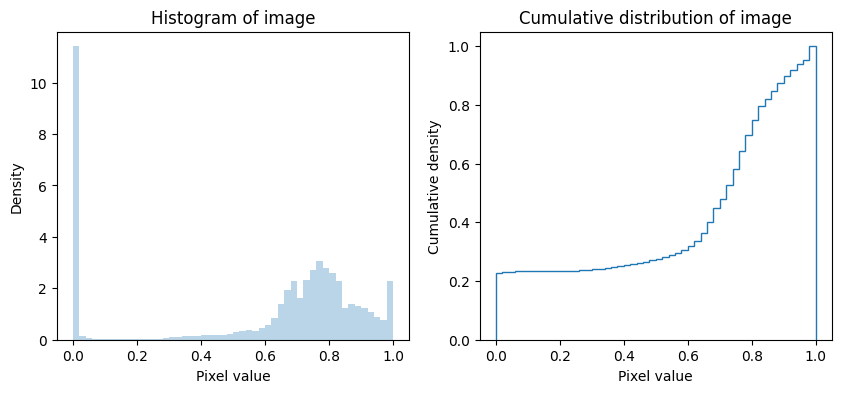


For function equalize_adapthist {"clip_limit": 0.03, "kernel_size": 12}


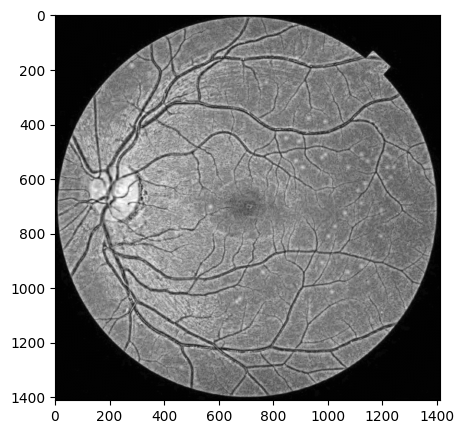

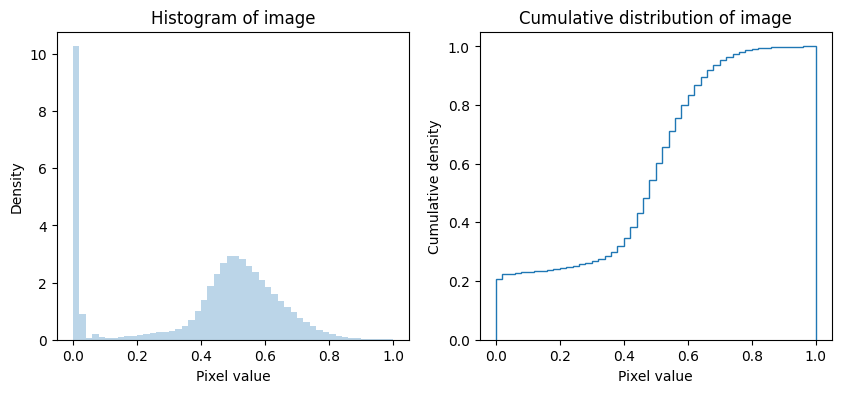


For function equalize_adapthist {"clip_limit": 0.1, "kernel_size": 12}


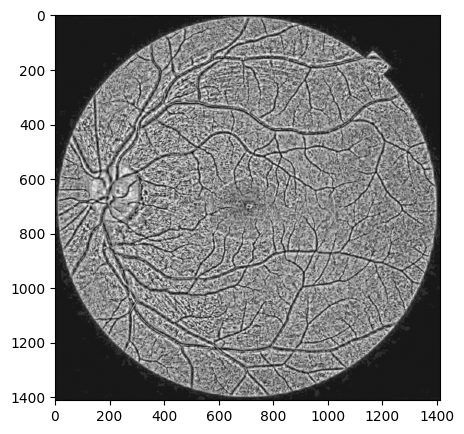

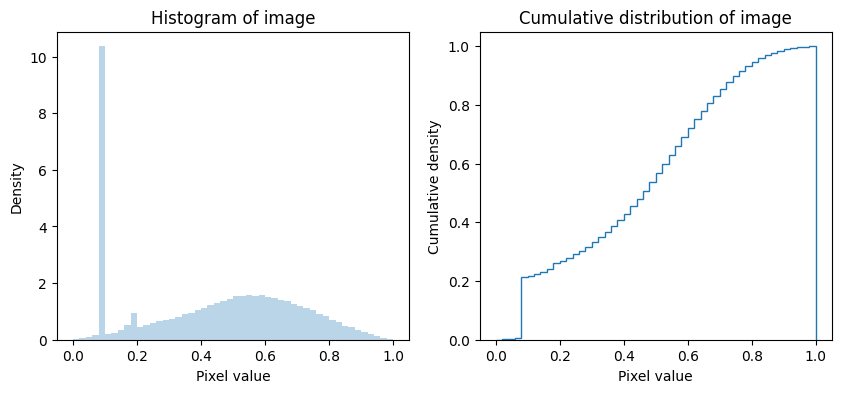

In [19]:
import json

def test_equalize(img, func, **kwargs): 
    img_equalized = func(img, **kwargs)
    plot_grayscale(img_equalized)
    plot_gray_scale_distribution(img_equalized)    
    return img_equalized

equalize_list = [
    exposure.equalize_hist,
    exposure.equalize_adapthist,
    exposure.equalize_adapthist,
    exposure.equalize_adapthist
]

args_list = [
    None,
    {'clip_limit': 0.01, 'kernel_size': 12},
    {'clip_limit': 0.03, 'kernel_size': 12},
    {'clip_limit': 0.1, 'kernel_size': 12},
]

for func, kwargs in zip(equalize_list, args_list):
    print('\nFor function ' + func.__name__ + ' ' + (json.dumps(kwargs) if kwargs else ''))
    
    retina_gray_scale_equalized = \
        test_equalize(retina_gray_scale, func, **kwargs) if kwargs \
        else test_equalize(retina_gray_scale, func)

> Answer the following questions:  
> 1. Compare the unequalized and equalized images. What aspects of the of the images are more apparent with the improved contrasted.  
> 2. Compare the distributions of pixel values between the unequalized image, the globally histogram equalized image, and the three adaptively equalized images. What do the differences in pixel distributions tell you about the effect of the equalization algorithms? Use the distribution of the random uniformly distributed random image as a benchmark.
> 3. Compare the globally equalized image histogram to the locally equalized image histograms. What is a key difference, and how can you explain this difference?   
> 4. The images and histograms created by the three clipping levels are quite different. What changes can you notice and how can you explain these differences given the algorithm?   
> **End of exercise.**

> **Answers:**  

> 1.  The more equalized the image, the more fine details you can see with the improved contrast. The equalize_hist function that gives us the global histogram equalized image, has the most enhanced constract but it washes out the fine details that can be seen more easily using equalize_adapthist.

> 2. 
Unequalized image: 
The pixel value distribution is not uniform, with intensities concentrated in a narrow range, which results in poor contrast.

Globally histogram equalized image:
The distribution becomes more spread out across the full intensity range, close to a uniform distribution.

Adaptively equalized images:
The distributions are not uniform but more distributed than the unequalized image. Rather than trying to uniformly flatten the global histogram, adaptive equalization seems to redistribute intensities locally, allowing for more fine details to be seen.

Uniform random image (benchmark):
This image produces an almost flat histogram, showing the ideal result of global histogram equalization. The difference from this benchmark shows how image details or structure affect the redistribution of intensities.

Overall, the differences show that global equalization aims to match a uniform distribution globally (across all pixel values), while adaptive equalization redistributes locally.

> 3. A key difference is that the globally equalized histogram is flatter across all pixel values, while the locally equalized histograms still show peaks in concentrated areas. This occurs because global histogram equalization redistributes pixel intensities across the entire image, whereas adaptive equalization operates on small regions independently. Local equalization enhances contrast by specific regions without enforcing a uniform histogram.  

> 4. The three clipping levels show that as the clipping level increases, the higher the contrast in local regions to show more fine details like the veins in the retina. In the lowest clip limit, we can see that the white, bright spot in the left was supressed (noise decreased) and the contrast is quite light causing the histogram to be a little more distributed compared to the unequalized image. In the mid-level clip limit, we see that the contrast in certains areas improved (we see more details like the veins). In the highest clip limit, there is a strong contrast enhancement, and we can see even more fine details. As clip limit increases, the culmulative distribution approaches the linear distribution we saw in the uniform random image. However, the higher the clip limit, we see that it can lso over enahnce the image (add noise).

### Equalization for Multi-Channel Images   

Contrast improvement, including histogram equalization, cannot be directly applied to the individual color channels of an RGB image. For RGB images the intensity of each color channel is mathematically unconstrained by the other two. However in reality, the brightness or intensity of each pixel depends on the value of all three channels. Therefore, independently applying 2-dimensional equalization to an RGB image causes normalization problems.  

A common approach is to transform an RGB image into one of several possible formats that use a 2-dimensional color space map or **chromatisity** map of image intensity. There are a great many such choices, a number of which are supported in the [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html) package.  

As an example, the [Hue Saturatipn and Value (HSV)](https://en.wikipedia.org/wiki/HSL_and_HSV) is a cylindrical coordinate map of hue as the angle, staturation as the radius and value as the vertical. The **HSV** color space is shown in the figure below.   


<img src="../img/HSV_Space.png" alt="Drawing" style="width:400px; height:400px"/>
HSV Color Space in Cylindrical Coordinates

> **Exercise 1-5:** To apply the [sklearn.exposure.equalize_adapthist](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist) function to a color image the following steps are used:
> 1. The [skimage.color.rgb2hsv](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2hsv) function is used to convert the *RGB* image to *HSV* format.     
> 2. The hue, saturation and value channels of the transformed image are displayed. Make sure to use the correct labels when you call the `plot_3_color_channels` function and set `plot_image=False`.
> 3. Equalize only the value channel (last dimension) of the HSV image, setting 'clip_limit=0.05'. .    
> 4. The equalized image is converted to *RGB* using the [skimage.color.hsv2rgb](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.hsv2rgb) funciton.
> 5. Plot the color channels and the composite image of the equalized image.
> 6. Display the histograms and cumulative density plots of the resulting image.  
>  
> Execute the code and examine the results.    

(1411, 1411, 3)
float64 0.0 1.0
(1411, 1411, 3)
float64 0.0 1.0


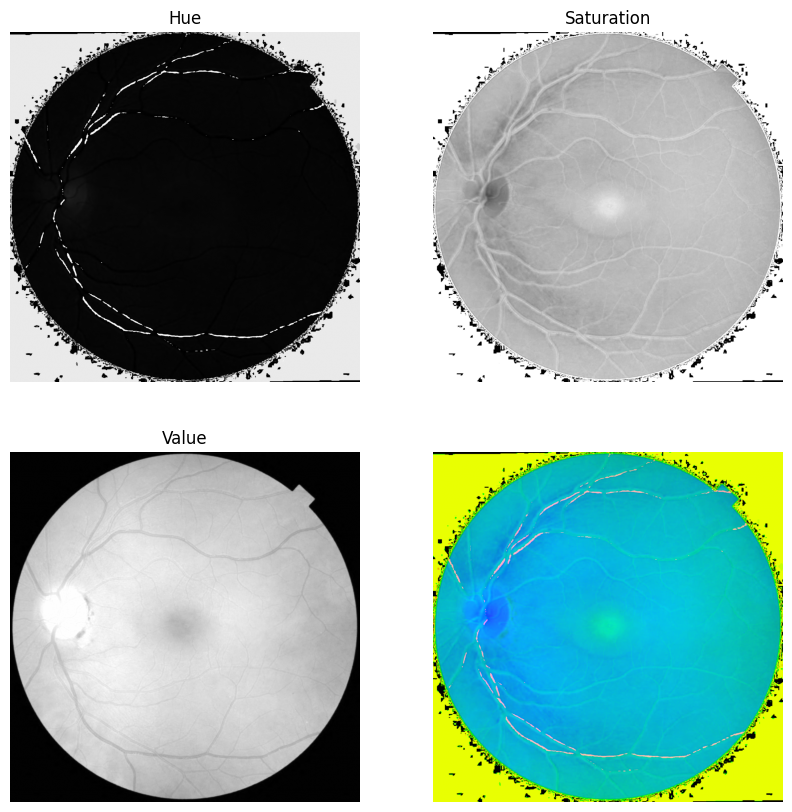

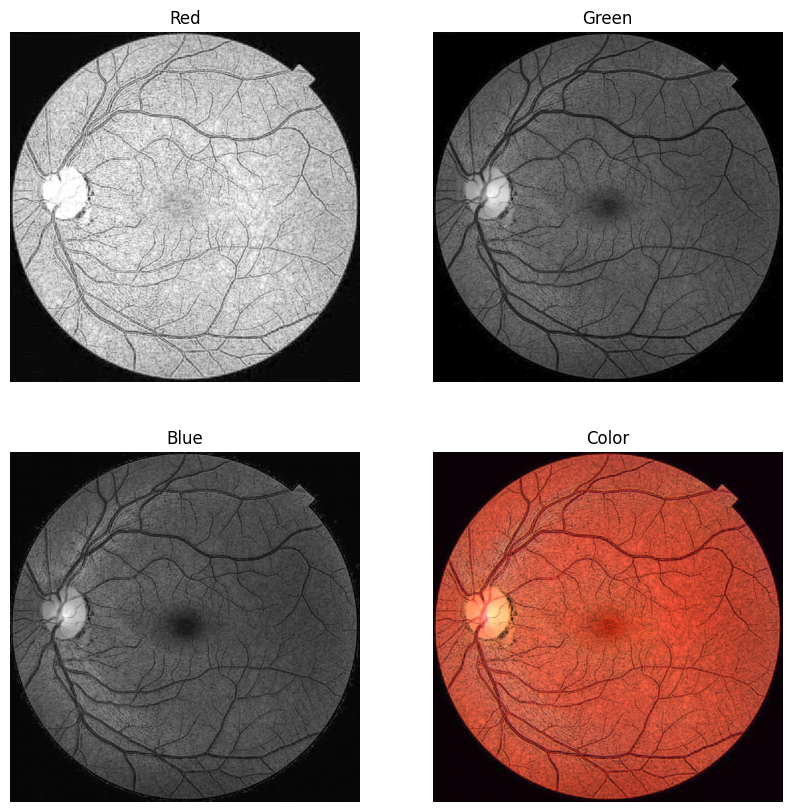

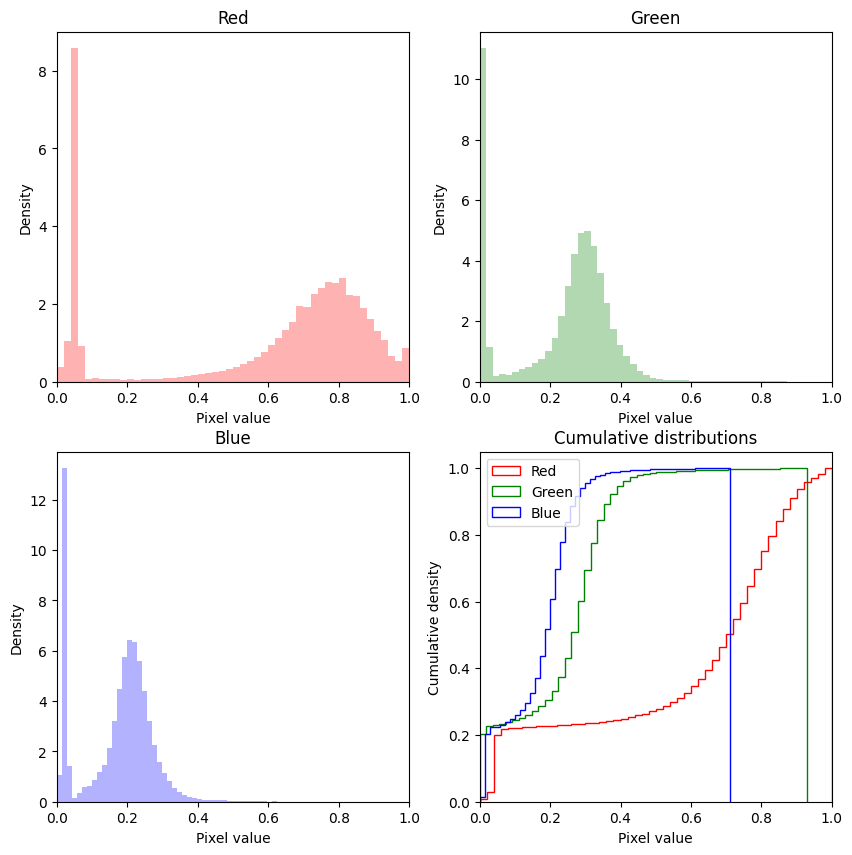

In [20]:
## Put your code below   
retina_hsv = rgb2hsv(retina_image)
plot_3_color_channels(retina_hsv, titles=['Hue','Saturation','Value',''], plot_image=False)

retina_hsv[:,:,2] = exposure.equalize_adapthist(retina_hsv[:,:,2], clip_limit=0.05, kernel_size=8)
retina_rgb = hsv2rgb(retina_hsv)
plot_3_color_channels(retina_rgb)
plot_image_distributions(retina_rgb, xlim=(0.0,1.0))  

> Notice that the hue component of the HSV repersentation of the image has saturated pixel values (not to be confused with color staturation of the HSV representation) and nearly constant. There is the expected variation in the saturation and value components of the HSV representation.
> 
> Compare the results above to the original unequalized RGB retina image and answer the following questions in one or a few sentences:    
> 1. Given the use of the locally adapted histogram equalization algorithm, explain the changes in the distribution of the pixel values in the three channels of the equalized image.
> 2. What evidence do you see that the histogram equalization achieve the goal of improving the contrast of the image?   
> **End of exercise.**

> **Answers:** 
> 1. Here, we see that locally adaptive histogram equalization is applied only to the value (V) channel, meaning its pixel distribution becomes more spread out across the intensity range. This reflects the enhancement of local contrast that we see in the three channels of equalized images. Since the value channel is based on brightness, the algorithm increases contrast primarily through brightness adjustment rather than changing any color information.      
> 2. From the images, we can see more fine details from improved contrast like retina vessels and boundaries appear more distinct compared to the original unequalized RGB image, while overall color consistency is about the same.   

### Rank equalization

Contrast improvement is such an important data preparation step for computer vision that many algorithms have been proposed. One approach is to use rank statistics over a small region or local region of the image. The [skimage.filters.rank.equalize](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.equalize) function implements just such an algorithm. Execute the code in the cell below to see the effect this algorithm has on the gray-scale retina image as size of the disk used to compute the histogram changes. 


Disk size: 5


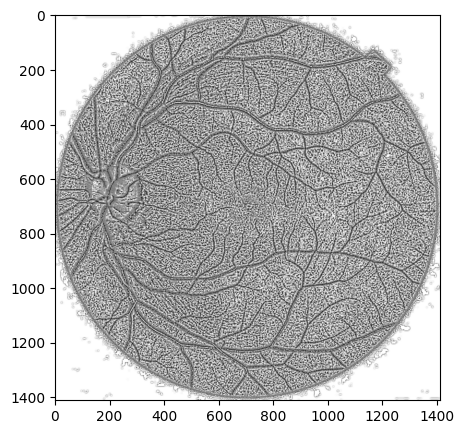


Disk size: 10


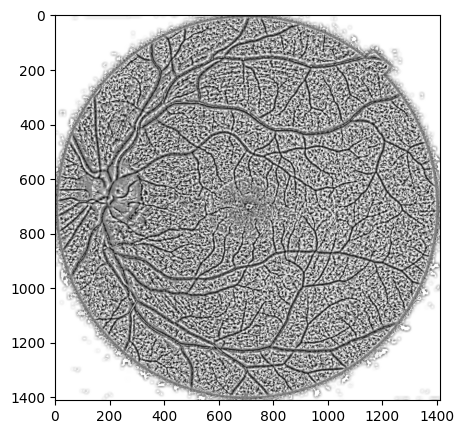


Disk size: 15


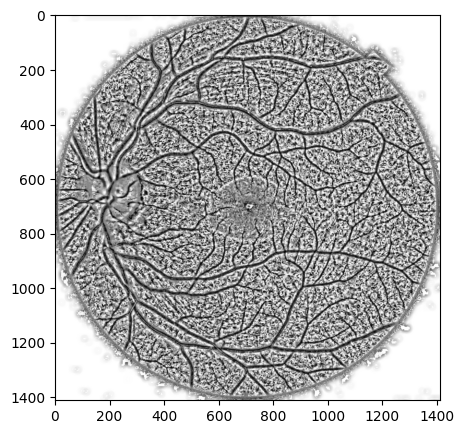


Disk size: 25


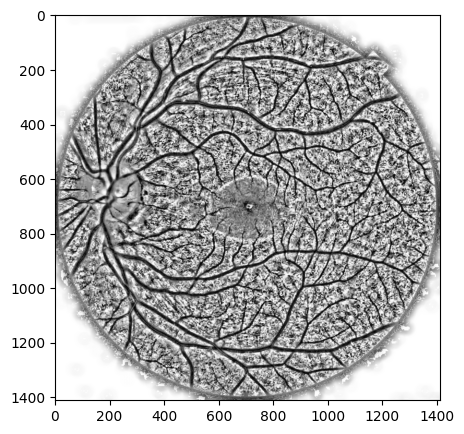

In [21]:
for disk_size in [5, 10, 15, 25]:
    print("\nDisk size: " + str(disk_size))
    retina_rank_equalized = equalize(np.multiply(retina_gray_scale, 255).astype(np.uint8), footprint=disk(disk_size))
    plot_grayscale(retina_rank_equalized)

This locally equalized image shows considerably more detail than the global histogram equalization or adaptive histogram equalization methods. As the disk size increases, the scale of the image features enhanced becomes larger and the contrast increases. But, is this what we really want? In some cases yes. If fine details like texture are important to the computer vision solution, this equalization would be preferred. However, too much detail might lead to unnecessary complexity if the goal was to identify major structural elements of the image. In summary, **the correct preprocessing for an image depends on the other algorithms one intends to apply!**

## Other Contrast Adjustments   

Besides histogram equalization, numerous mathematical transformations for improving contrast have been developed. These methods seek to improve contrast by a nonlinear transformation of the pie values. We will examine just of few of the many possibilities:     

- **Gamma adjustment** is a power law transformation that shifts the histogram of the pixel values. For input pixel values $x_i$, and power, $\gamma$, the output pixel values are computed $x'_i = gain * x_i^{\gamma}$, were gain is an optional scale adjustment. If $\gamma < 1$ the histogram shifts to the right and for $\gamma > 1$ the histogram shifts to the left.     
- **Logarithmic adjustment** computes a logarithmic compression of the pixel values, $x_i$, $x'_i = gain * log(x_i + 1)$, where gain is an optional scale adjustment.     
- **Sigmodal adjustment** is a nonlinear transformation of the pixel values, $x_i$, with a cutoff value, $x'_i = \frac{1}{1 + exp(gain * (cutoff - x_i))}$, and an optional gain adjustment. 

> **Exercise 1-6:** To get a feel for the gamma adjustment method you will now do the following:  
> 1. Iterate over gamma values of $[0.5, 1.0, 2.0]$.     
> 2. Apply the gamma adjustment [skimage.exposure.adjust_gamma](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.adjust_gamma) function to the gray scale retina image.     
> 3. Display the adjusted image and the pixel value density. Make sure you include a printed indication of gamma for each case.      
> 4. Execute your code.  


Gamma value: 0.5


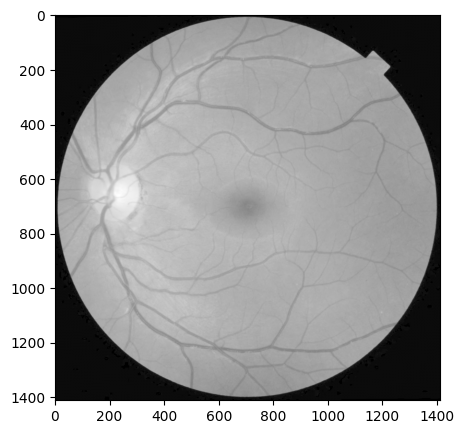

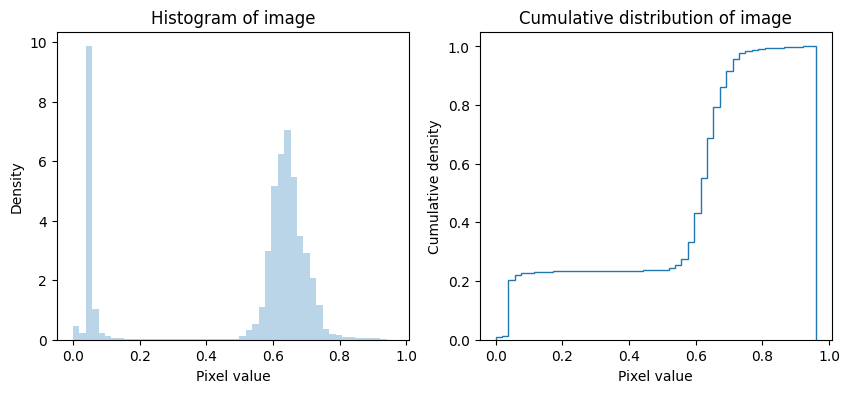


Gamma value: 1.0


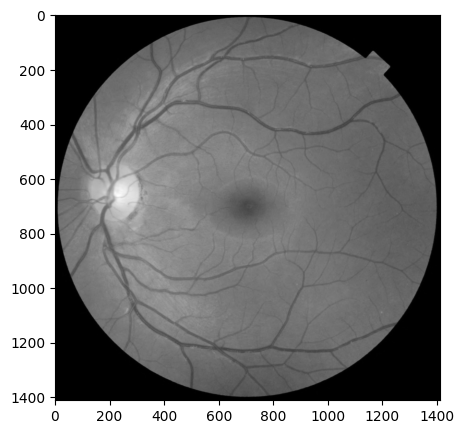

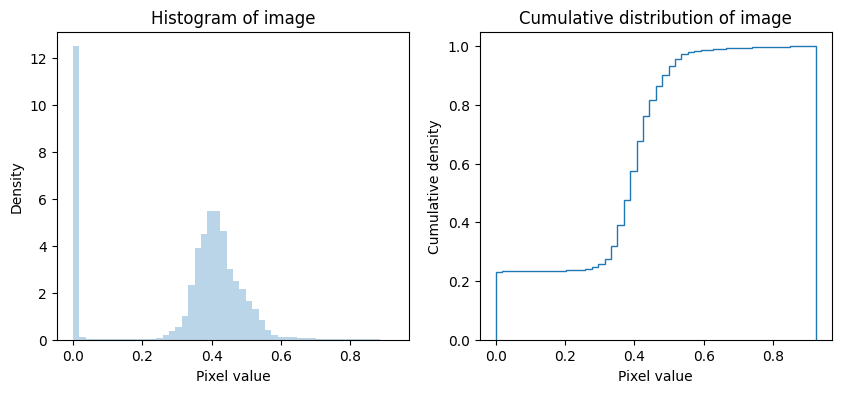


Gamma value: 2.0


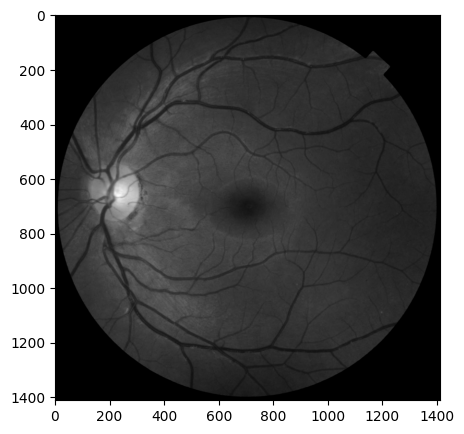

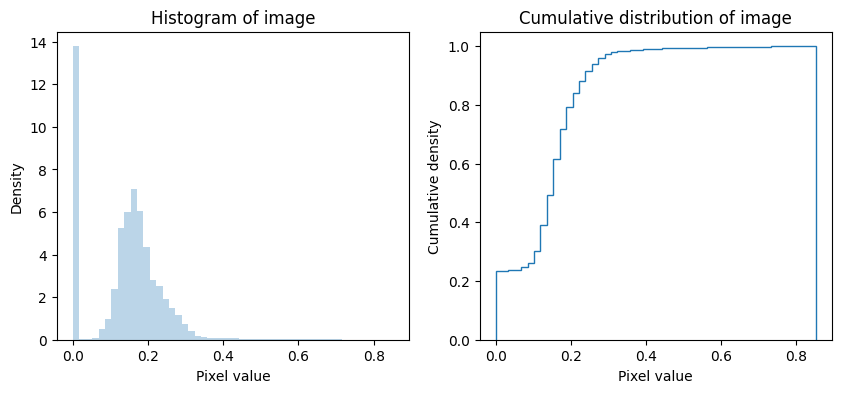

In [ ]:
## Place your code below    
for gamma in [0.5, 1.0, 2.0]:
   gamma_adjusted_img = exposure.adjust_gamma( retina_gray_scale, gamma )
   print("\nGamma value: " + str(gamma))
   plot_grayscale( gamma_adjusted_img )
   plot_gray_scale_distribution( gamma_adjusted_img )


> Examine your results for the values of gamma, comparing them to the original gray-scale image, $\gamma = 1.0$. How do the brightness of the image and the distribution of pixel values change with gamma?    
> **End of exercise.**   

> **Answer:**  The pixel value intensities decrease with increased gamma. The lower gamma image compared to the original is brighter overall and the higher gamma image is darker overall. For the lower gamma image, the histogram shifted towards the right and for the higher gamme image, the histogram shifted to the left.   

> **Exercise 1-7:** To get a feel for the sigmodial adjustment method you will now do the following:  
> 1. Iterate over cutoff values of $[0.3,0.4,0.5]$.     
> 2. Apply the sigmoidal adjustment [skimage.exposure.adjust_sigmoid](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.adjust_sigmoid) function to the gray scale retina image.     
> 3. Display the adjusted image and the pixel value density. Make sure you include a printed indication of gamma for each case.      
> 4. Execute your code.  


Sigmoidal value: 0.3


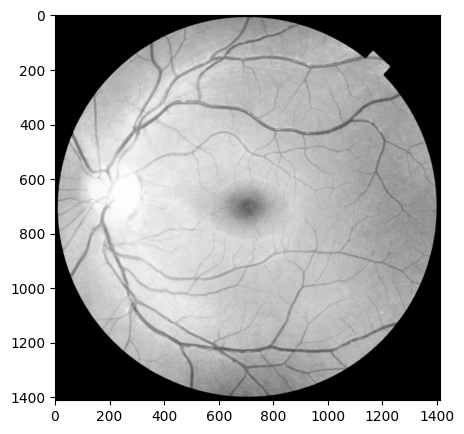

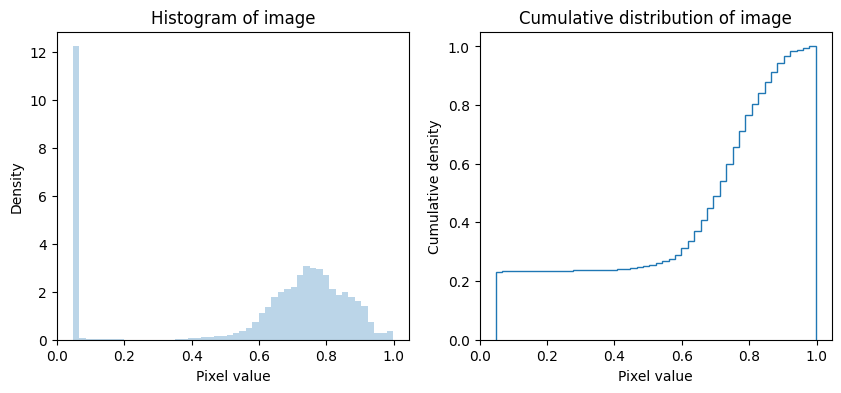


Sigmoidal value: 0.4


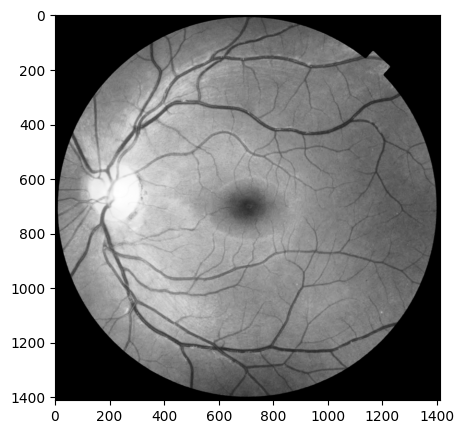

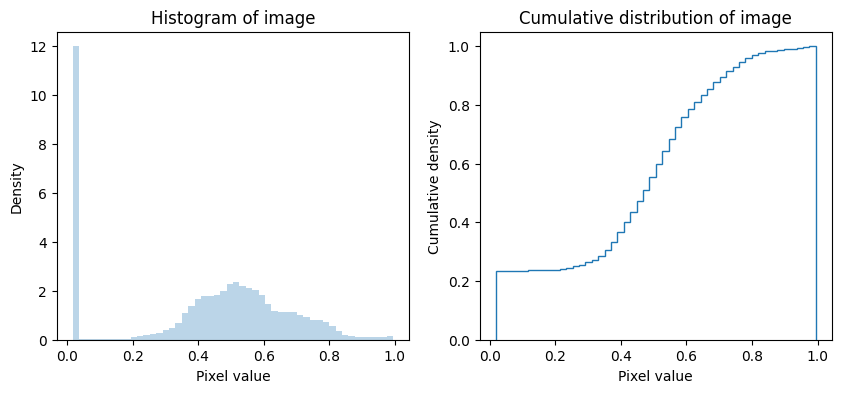


Sigmoidal value: 0.5


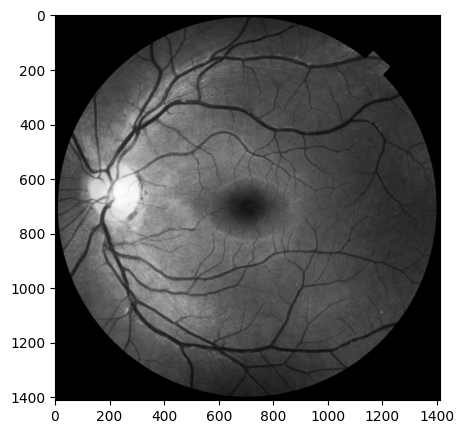

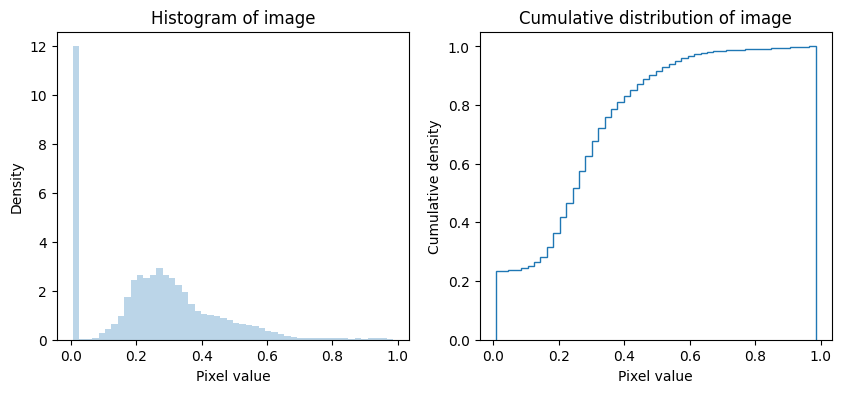

In [28]:
## Put your code below
for sigmoid in [0.3, 0.4, 0.5]:
   sigmoid_adjusted_img = exposure.adjust_sigmoid( retina_gray_scale, sigmoid )
   print("\nSigmoidal value: " + str(sigmoid))
   plot_grayscale( sigmoid_adjusted_img )
   plot_gray_scale_distribution( sigmoid_adjusted_img )

> Examine the images and the pixel value densities for the resulting images and compare these to the original gray-scale image. How does the brightness and densities change with the cutoff value? Pay attention to expansion or compression of the range of pixel values.   

> **Answer:**  For the cutoff of 0.3, the image is brighter overall as high intensity pixel values are compressed (if we see the cumulative distribution compared to original gray scaled's) and there is an expansion of pixel values compared to original gray scale image. The pixel value density shifted to the right. For cutoff of 0.4, the density of pixel values were compressed although the mass of it is within the same range as the gray scaled's. There are less high pixel values if we see the culmulative distribution, indicating that it's less contrasted and a but brighter. For cutoff of 0.5, the contrast is increased and image is darker overall. The pixel value densities shifted slightly to the left and the histogram is more flattened compared to the original gray scaled's.      

## Binary Images  

Many computer vision algorithms operate on binary images. Primarily these methods are in the category of **morphology**, which we will explore later. A binary image has only two values, $\{positive, negative \}$ or $\{ 1, 0 \}$.   

> **Exercise 1-8:** You will complete a function named `transform2binry()` to convert a 3-channel color image or gray scale image to a integer binary image, $\{ 1, 0 \}$, given a threshold value in the range $0 \le threshold \le 1$ as an argument. The function must do the following:    
> 1. If the image is multi-channel, convert it to gray-scale.     
> 2. Transform the threshold value to the fraction of the range of the pixel values between the minimum and the maximum. Print the transformed threshold value.    
> 3. Apply the threshold to the gray-scale pixel values and return the binary images.     
> 4. Execute your function on the **locally equalized color** retina image, print the dimensions of the binary image, and display the image, using a threshold value of 0.37.  
> 5. Execute your function on the **locally equalized gray scale** retina image, print the dimensions of the binary image, and display the image, using a threshold value of 0.37.      

Transformed Threshold: 0.34241111970472443
(1411, 1411)


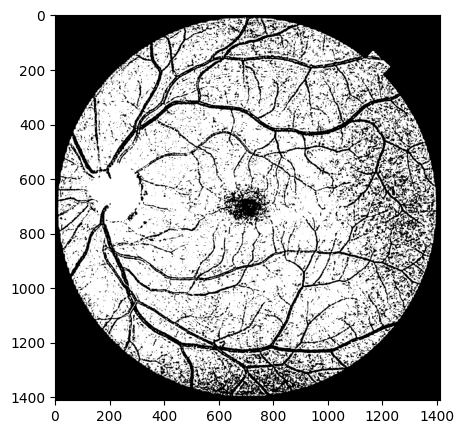

Transformed Threshold: 0.37
(1411, 1411)


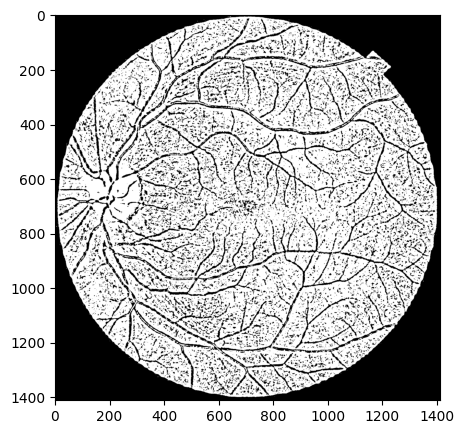

In [30]:
## Put you code below
def transform2binary(img, threshold=0.5):
    '''
    Function converts a gray scale or color image to binary values. 
        Args: 
            img - a color or gray scale image file
            threshold = the threshold value on a 0-1 scale. Pixel values >= threshold are set to 1, else 0
        Returns:
            Binary 2d image as a numpy array
    '''
    ## Make sure to use a copy to prevent weird bugs that 
    ## that are nearly impossible to track down  
    img = np.copy(img)
    
    ## Complete the code below 
    # 1. convert image to gray scaled IF not gray scaled
    if len(img.shape) == 3:
        img_gray_scaled = rgb2gray(img)
    else:
        img_gray_scaled = img

    # 2. transform threshold to fraction of the range of pixel values between min and max (normalize/rescale)
    min_val = img_gray_scaled.min()
    max_val = img_gray_scaled.max()
    new_threshold = min_val + (threshold * (max_val - min_val)) # note for me: add the min val to ensure the threshold starts where the image's data actually begins
    print(f"Transformed Threshold: {new_threshold}")

    # 3. apply threshold
    _, binary_image = cv.threshold(img_gray_scaled, new_threshold, 1, cv.THRESH_BINARY) #note: 'maxval' to 1 because this exercise specifically asks for {1, 0}

    return binary_image

for img in [retina_rgb, retina_gray_scale_equalized]: 
    retina_binary = transform2binary(img, threshold=0.37)
    print(retina_binary.shape)
    plot_grayscale(retina_binary)

> Examine the image and answer the following questions in one or a few sentences.  
> 1. Does the binary image created from the equalized color image capture key aspects of the retina structure and why?     
> 2. Compare the binary images created from the equalized color image and the equalized gray scale image. What are the differences, and is this the result you would expect and why?  
> **End of exercise.**      

> **Answers:**
> 1. The binary image captures the main vessel structures of the retina pretty well because local equalization enhances the contrast between the blood vessels and the background tissue, and then by applying a 0.37 threshold to the normalized range, it isolates the darker features (vessels) from the lighter background. But we can also see that this process also captures some noise most likely because the equalization added too much contrast or noise in certain areas where there isn't actually that much detail (all those black dots).       
> 2. The binary image created from the equalized grayed scaled image has less noise (it's cleaner). This is because when you equalize a color image before converting to gray scaled, it equalizes the RGB channels independently, which can introduce noise from the other color channels which may be overexposed or too dark. Equalizing a gray scale image directly provides a more uniform distribution of intensity that's specifically tuned to the structural brightness rather than the color variations (basically simplifies the image by removing a dimension that isn't needed to extract the fine details by applying the binary filter).

In the foregoing exercise, the threshold for the decision classifying pixel values as true or false, $\{ 0, 1 \}$ was set manually by trial and error. There are numerous algorithms which have been devised for finding thresholds. In general, these algorithms attempt to find an optimal threshold using various measures. Ideally, these algorithms search for a low frequency point in the pixel value histograms which can be used to divide the values.     

**Exercise 1-9:** We can create a binary image using one of the many established algorithms to compute a threshold. In this case you will apply the widely used [Otsu's threshold algorithm](https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=threshold_otsu#skimage.filters.threshold_otsu) to the adaptively equalized gray-scale image. Use this function to find a threshold, apply the threshold to the the equalized gray-scale image to compute a binary image, print the computed threshold and display the result.       

Otsu's threshold: 0.400390625
Transformed Threshold: 0.400390625


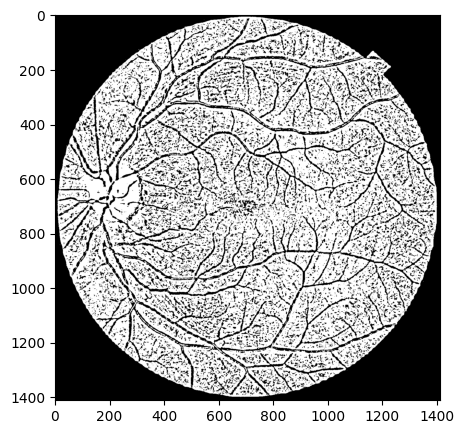

In [31]:
# Notes: Otsu’s algorithm looks at the histogram of the image and finds a value that minimizes
# the variance within each cluster (background and foreground). It finds the "sweet spot" that
# best separates the two peaks in a bimodal histogram.

# Put you code below
from skimage.filters import threshold_otsu

# 1. compute optimal threshold using Otsu's algorithm
otsu_threshold = threshold_otsu(retina_gray_scale_equalized)
print(f"Otsu's threshold: {otsu_threshold}")

# 3. apply threshold to create the binary image
retina_binary_otsu = transform2binary(retina_gray_scale_equalized, threshold=otsu_threshold)

# 4. display result
plot_grayscale(retina_binary_otsu)

> How does this binary image compare the to ones computed with the threshold found by trail-and-error, and why?       
> **End of exercise.**

> **Answer:**   It is pretty similar to the one that resulted from the trial and error threshold of 0.37 because the otsu threshold is 0.4. It's difficult to tell the difference visually. They both show a pretty clean black and white image of vein details in the retina image.   

## Inversion of Images  

For some machine vision algorithms it is easier or more effective to work with the **inverse image** or **negative** of the image. The concept is simple. Pixel values are generally restricted to a range like $\{ 0 - 255 \}$ for unsigned integer representation or $\{ 0.0 - 1.0 \}$ for a floating point image. The given an intensity $P_{i,j}$ of the $ij$th pixel, the inverted intensity, $I_{i,j}$, is then:

$$I_{i,j} = max\big[ P \big] - P_{i,j}$$

Where, $max\big[ P \big]$ is the largest value the representation of the image allows, typically 255 or 1.0. 

> **Exercise 1-10:** You will now write a function named `invert_image` that will perform image inversion on both 3-channel and gray-scale images. Make sure you find the correct maximum value for the data type of the image, 255 for `unit8` or 1.0 float.     
> 
> Now, apply your function to the original color retina image and display the image along with the density plots, histograms of the channels and CDF.   

(1411, 1411, 3)


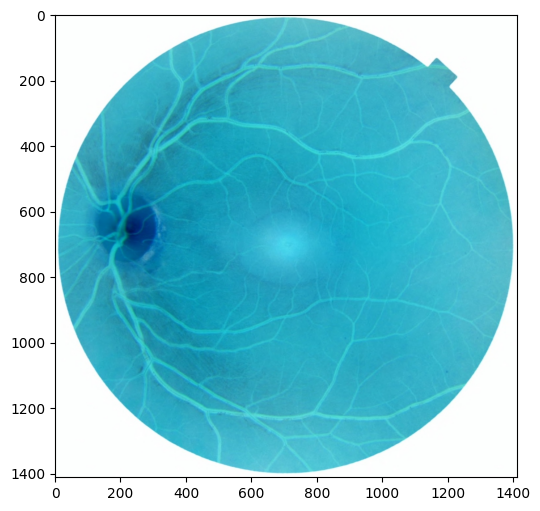

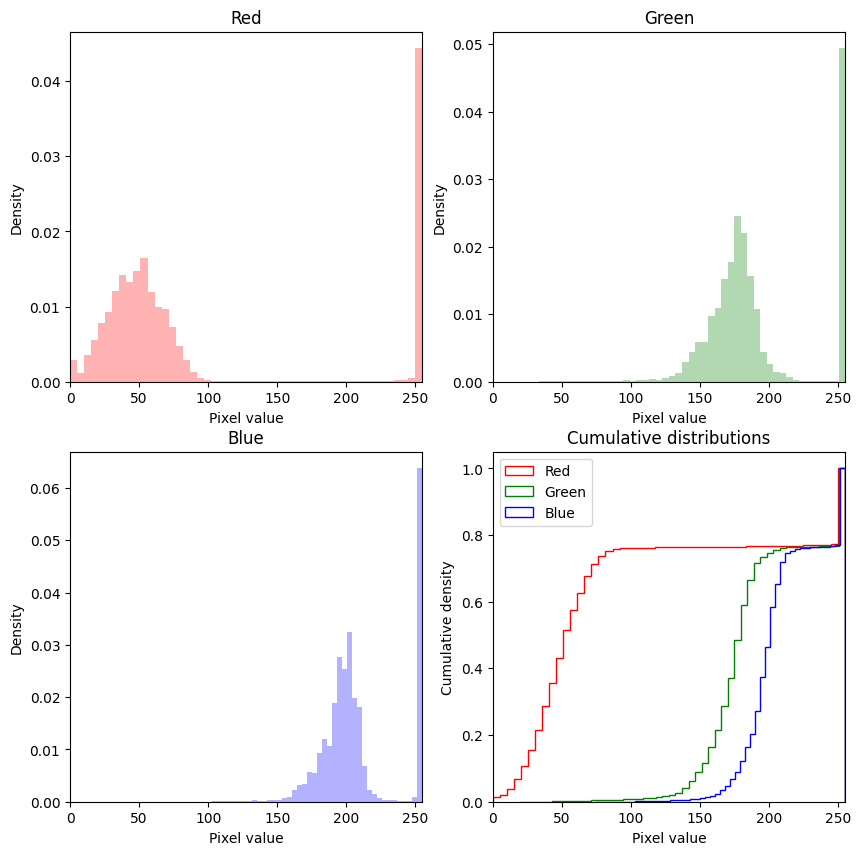

In [ ]:
def invert_image(img):
    '''
    Function to invert an image, or create the negative.  
        Args:
            img - a 2d gray scale or color image
        Returns: 
            Inverse of the image
    '''
    ## Make sure to use a copy to prevent weird bugs that 
    ## that are nearly impossible to track down  
    img = np.copy(img)
    
    ## Put your code below  
    
    # 1. find max value for data type of image
    if img.dtype == 'uint8':
        max_val = 255
    else:
        max_val = 1.0
    
    # 2. invert image
    img_inverted = max_val - img
    return img_inverted

inverted_retina = invert_image(retina_image)
print(inverted_retina.shape)

fig, ax = plt.subplots(figsize=(6, 6))
_=ax.imshow(inverted_retina)
plot_image_distributions(inverted_retina)   

> Answer the following questions in one or a few sentences in the space provided at the end of the exercise:   
> 1. Compare the distribution of the pixel values for the three color channels of the inverted image with the distributions for the original image. Do the distributions for the inverted image make sense given the original values and why? 

> 2. Do you think the color of the displayed 3-channel inverted image is correct and why?  


> Next, apply your function to the adaptive histogram equalized gray-scale retina image and display the image along with the distribution plot. 

(1411, 1411)


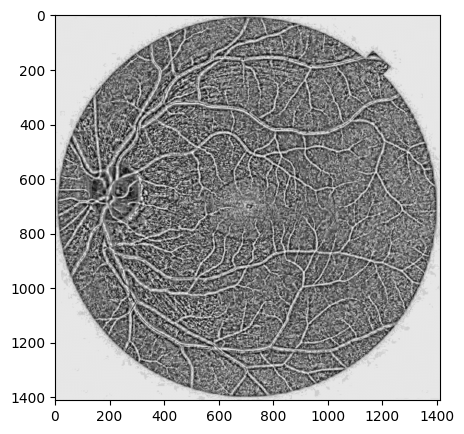

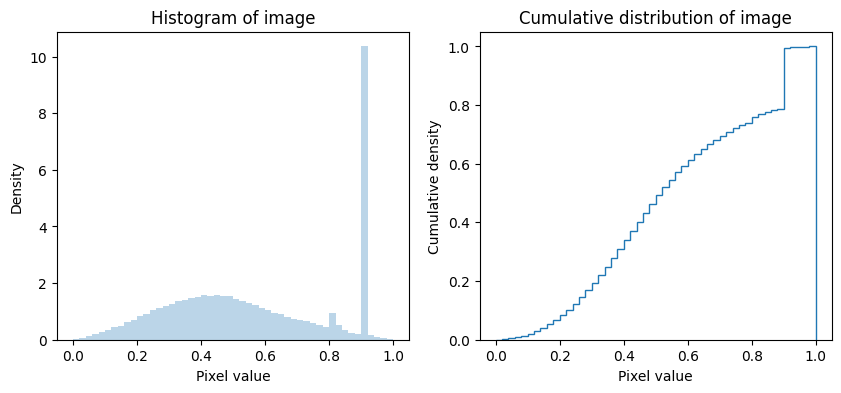

In [33]:
inverted_retina_grayscale = invert_image(retina_gray_scale_equalized)
print(inverted_retina_grayscale.shape)
plot_grayscale(inverted_retina_grayscale)
plot_gray_scale_distribution(inverted_retina_grayscale) 

> 3. The difference in pixel value distributions between the inverted gray scale and original adaptive histogram distributions are subtle. What key difference can you identify?     
> **End of exercise.**

> **Answers:**
>  1. Yes, the pixel value distributions reflected across the midpoint of the x-axis. This makes sense because mathematically, this is performing a transformation $f(x) = -x + C$, where C = constant or the max possible value. This preserves the shape of the distribution but flips its orientation across the intensity x-axis.
> 2. The color of the 3 channel inverted image is turquoise, and this makes sense if we see a color wheel. The retina orignal image is red and orange and the opposite of that in the color wheel is blue-green.    
> 3. The black and white values flipped. the vessels that were dark are now light and the background of the retina is darker instead of lighter.            

## Sampling and resizing images      

For many computer vision processes the dimensions of an image must be transformed. We have already explored removing the multi-channel color dimension from an image to form the gray-scale image. Now, we will investigate transformation the pixel row and column dimensions of an image. There are two options:       
1. **Down-sample:** A down sampled image has a reduced number of pixels. If the multiple between the pixel count of the original image and the down-sampled image an even number, sampled pixel values are used. Otherwise, interpolation is required for arbitrary multiples. Inevitably, down-sampling will reduce the resolution of the image, and fine details will be lost.                    
2. **Up-sample:** The number of samples can be increased by interpolation between the pixel values. The interpolated values fill in the values of the new pixel. If the pixel count of the up-sampled image is not an even multiple of the original image most of the values will be interpolated. While up-sampling can increase the number number of the pixels, this process cannot increase the resolution of an image. Later in the course, we will explore using generative models for this task.        

> **Exercise 1-11:** You will now resize the adaptive histogram equalized gray-scale image. Using the [skimage.transform.resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize) function, do the following:      
> 1. Down-sample the image to dimension $(64,64)$. Print the dimensions and display the resulting image.      
> 2. Up-sample the down-sampled image to dimension $(1024,1024)$. Print the dimensions and display the resulting image.

downsized image dims:  (64, 64)
upsized image dims:  (1024, 1024)


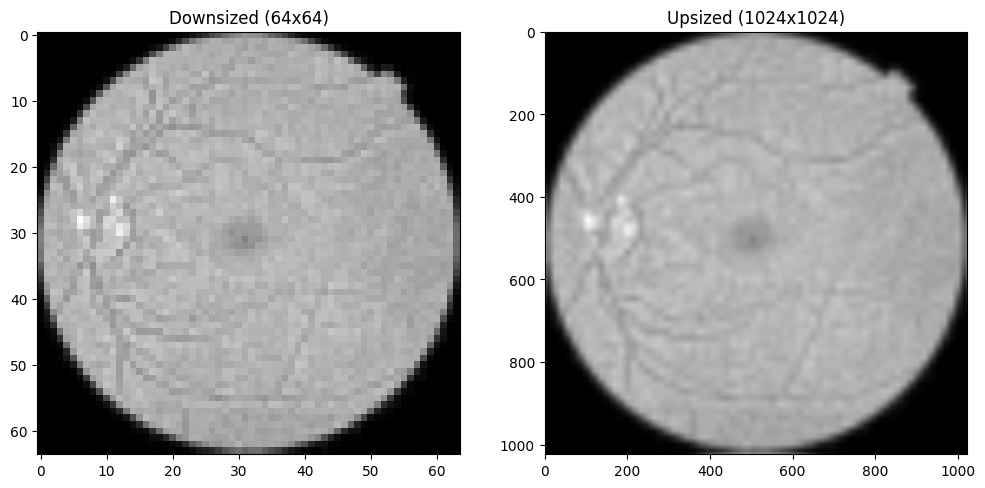

In [41]:
## down sample the image
## Put you code below

_, ax = plt.subplots(1, 2, figsize=(12, 6)) 

# 1. down sample
downsized_gray_scale_equalized = resize(retina_gray_scale_equalized, (64,64))
print(f'downsized image dims: ', downsized_gray_scale_equalized.shape)
ax[0].imshow(downsized_gray_scale_equalized, cmap='gray')
ax[0].set_title("Downsized (64x64)")

# 2. up sample the down sampled image
upsized_gray_scale_equalized = resize(downsized_gray_scale_equalized, (1024,1024))
print(f'upsized image dims: ', upsized_gray_scale_equalized.shape)
ax[1].imshow(upsized_gray_scale_equalized, cmap='gray')
ax[1].set_title("Upsized (1024x1024)")

plt.show()

> Notice the changes in resolution of the down-sampled and up-sampled images. Answer these questions in one or a few sentences.     
> 1. How is the reduction in resolution of the $(64,64)$ image exhibited? 
> 2. Does up-sampling to $(1024,1024)$ restore the resolution of the image or simply blur the 'pixelation' visible in the $(64,64)$ image? 

> **Answers:**
> 1. The reduction in resolution is shown by how pixelated it looks and the loss of fine details. In the $(64,64)$ image, small features like the veins in the retina are no longer visible or hard to see (the bigger veins) because many original pixels have been averaged into a single large block in each area. Smooth curves now appear jagged. # note: aliasing 
> 2. No, up-sampling to $(1024,1024)$ cannot restore the original resolution. The original resolution is the best res we can get. It simply blurs/smooths the pixels from the "lower" resolution source. Once data is lost during down-sampling, it's gone forever. When up-sampling, the algorithm will use interpolation to "guess" the values of the new pixels by averaging the neighbors. This results in a soft or blurry image because the algorithm cannot simply create the sharp edges of the blood vessels that were lost earlier.        

## Sampling and Aliasing in Images     

As should be clear from the foregoing, the digital images we work with for computer vision are discretely sampled in the 2-dimensional plane. The discrete pixel values are $v_{\mathbf{x}}$ are the result of this sampling. This discrete sampling limits the **spatial resolution** which can be captured in the image. If the samples are spaced too far apart, [aliasing](https://en.wikipedia.org/wiki/Aliasing) will occur. For sinusoidal components of the image the [Nyquist Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) states that the sampling frequency must be greater than 2 times the frequency of this component. The sampling rate of 2 times the highest frequency component is known as the **Nyquist Frequency**. Sampling below the Nyquist frequency leads to aliasing. The Shannon Nyquist limit is easy to express mathematically.

$$B \lt \frac{f_s}{2}$$
Where, $B$ is the **band limit** or highest freqency sampled, and $f_s$ is the sampling frequency or rate.   

We can illustrate this concept with a example. The code in the cell below plots a sine function with Nyquist rate sample points, shown as orange dots. Execute this code and examine the results.       

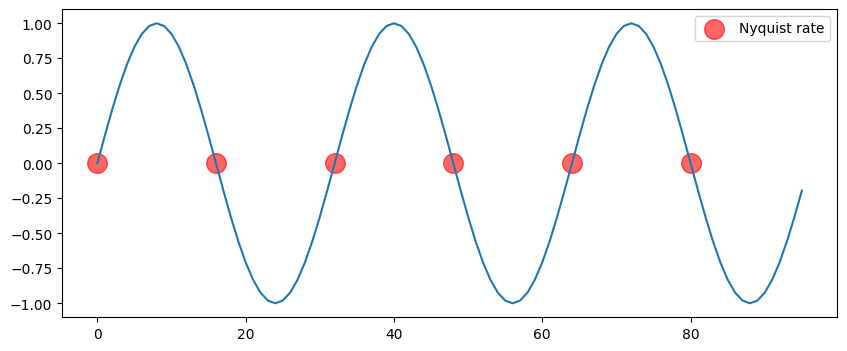

In [42]:
## Compute the sine funciton
samples_per_cycle = 16
cycles = 6
x = [x for x in range(cycles*samples_per_cycle)]
signal_1d = [math.sin(w*math.pi/samples_per_cycle) for w in x]   

## Plot the sine function 
_ , ax = plt.subplots(figsize=(10,4))
ax.plot(x, signal_1d);

## Sample points at the Nyquist rate   
sample_rate = 16
ax.scatter(x[0::sample_rate], signal_1d[0::sample_rate], c='red', s=200, alpha=0.6, label='Nyquist rate');
ax.legend();

Notice that all the Nyquest rate sample points are at the zero-crossing of the sine function. It is clear that this sample is aliased, since the sine funcition cannot be reconstructed from these samples.     

What is the result of increasng the sample rate above the Nyquist rate? To find out, execute the code in the cell below which uses a sampling rate just above the Nyquist rate.       

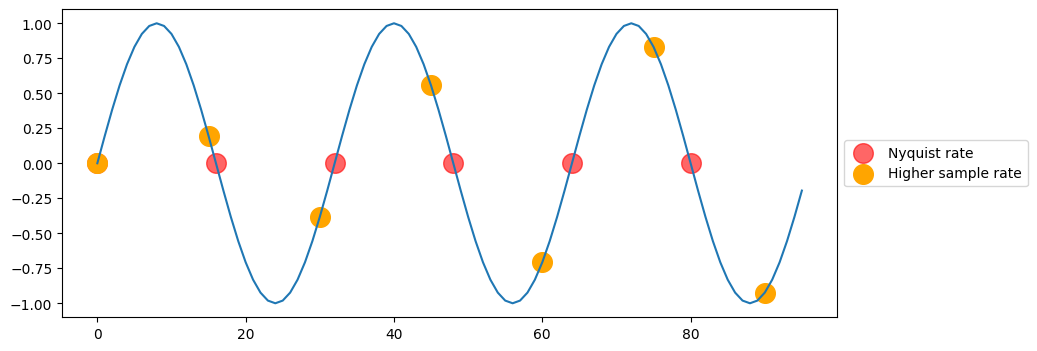

In [43]:
## Plot the sine function and ample points at the Nyquist rate   
_, ax = plt.subplots(figsize=(10,4))
ax.plot(x, signal_1d);
ax.scatter(x[0::sample_rate], signal_1d[0::sample_rate], c='red', s=200, alpha=0.6, label='Nyquist rate');

## Plot sample points just greater than the Nyquist rate   
high_sample_rate = 15
ax.scatter(x[0::high_sample_rate], signal_1d[0::high_sample_rate], c='orange', s=200, label='Higher sample rate');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Notice that the higher sampling rate appears to be sufficient to represent the sine function signal. A sine function can be fit to these sample points that will exactly fit a sine curve to the signal.     

What happens if we reduce the sample rate by a factor of 2? To find out the code in the code below expands previous example by doing the following:    
1. Plot the original sine function and sample points with frequency just above the Nyquest rate.
2. Compute a sine function with frequency 1/2 the first sine function.    
3. Plot the low frequency sine function and the low rate sample points and green Xs. The sample rate is one half the higher sample rate. 
4. Plot a highlight of the low-frequency sampling on the high frequency sine function.These points will show 

Execute the code and examine the results.      

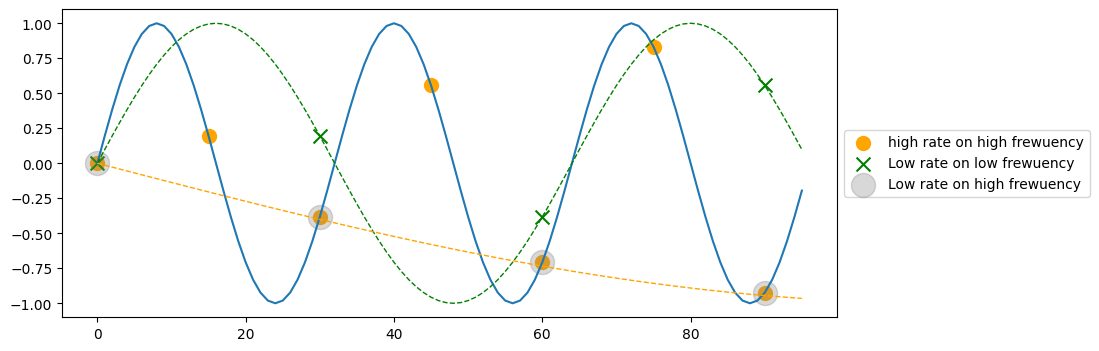

In [44]:
## PLot the original sine function and sample points  
_ , ax = plt.subplots(figsize=(10,4))
ax.plot(x, signal_1d);
ax.scatter(x[0::high_sample_rate], signal_1d[0::high_sample_rate], c='orange', s=100, label='high rate on high frewuency');

## Compute the douw sampled rate and low frequency sine funciton 
up_sample_rate = int(2*high_sample_rate)
downsample_rate = 2.0 * samples_per_cycle
signal_downsampled = [math.sin(w*math.pi/downsample_rate) for w in x] 

signal_aliased = [-math.sin(0.14 * w * math.pi/downsample_rate) for w in x]

## Plot the low frequency sine function and sampling points  
ax.scatter(x[0::up_sample_rate], signal_downsampled[0::up_sample_rate], c='green', marker='x', s=100, label='Low rate on low frewuency');
ax.plot(x, signal_downsampled, c='green', linestyle='dashed', linewidth=1.0);
ax.plot(x, signal_aliased, c='orange', linestyle='dashed', linewidth=1.0);

## PLot the low sample rate at the high frequency sine function  
ax.scatter(x[0::up_sample_rate], signal_1d[0::up_sample_rate], c='gray', marker='o', s=300, alpha=0.3, label='Low rate on high frewuency');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Observe that there are only 5 low frequency sample points required for the low frequency sine function. Additionally, notice that each of these low rate sample points are insufficient to represent the higher frequency sine function, meaning that the low sample rate is aliased by the high frequency sine function.     

What sample rate is required for a signal that is a composite of the high frequency sine funciton and the low frequency sine function? By the Shannon-Nyquist theorem the sample rate required is 2 times the highest frequncy component of composite signal. To demonstrate this principle the code in the cell below plots the composite signal along with the sample points. Execute this code and examine the results.         

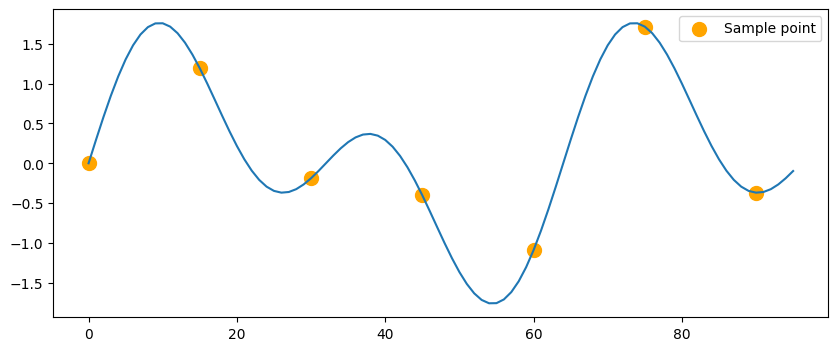

In [45]:
composite_signal = np.add(signal_downsampled, signal_1d)

_ , ax = plt.subplots(figsize=(10,4))
ax.plot(x, composite_signal);
ax.scatter(x[0::high_sample_rate], composite_signal[0::high_sample_rate], c='orange', s=100, label='Sample point');
ax.legend();

Observe that the sample points appear sufficient to reproduce the composite signal since there are more than 2 samples per high frequency cycle. 

We can demonstrate the concept of aliasing for an 2-D image with a simple example. The example is based on an initial image and three down-sampled versions:    
1. The initial image has diagonal slashes with sinusoidal amplitudes and dimension $(256,256)$.  
2. The image is down-sampled to dimension $(256, 256)$. 
3. The image is down-sampled to dimension $(128, 128)$. 
4. The image is down-sampled to dimension $(64, 64)$.
   
Execute the code and examine the results. 

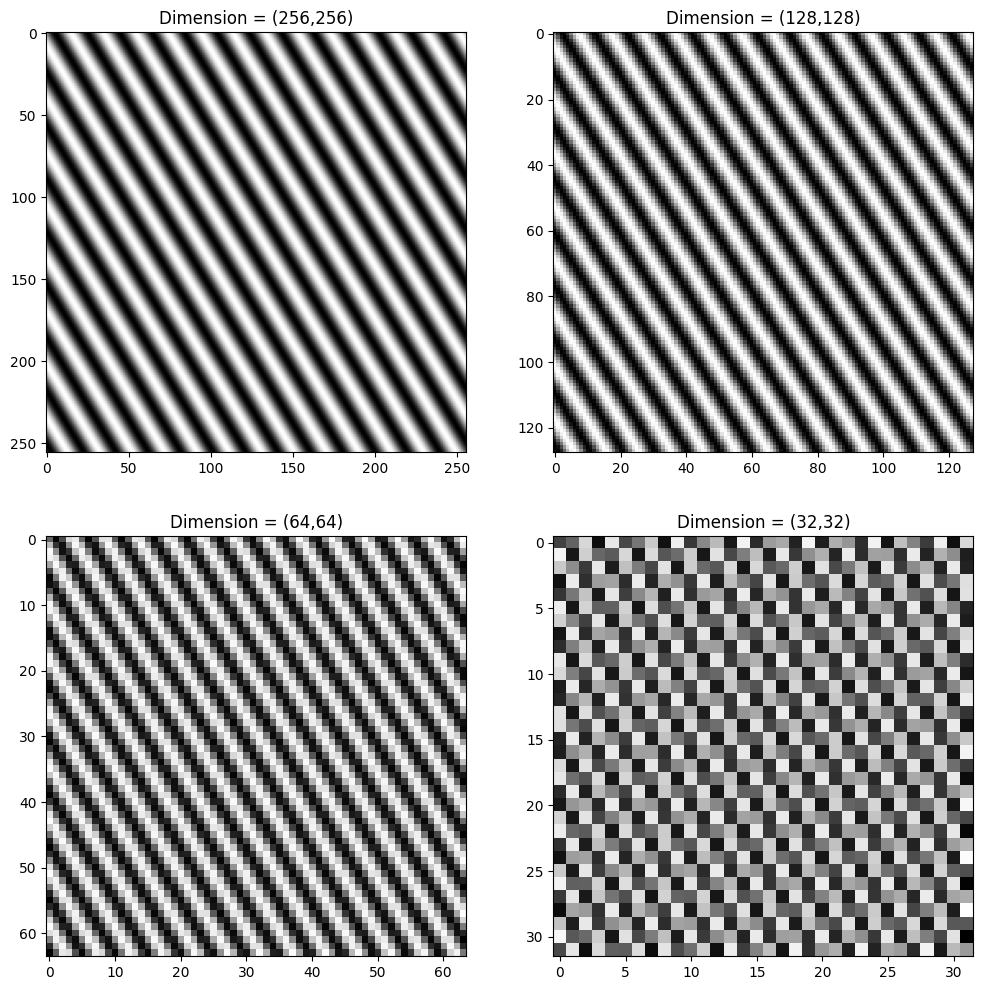

In [46]:
dim = 256
x = np.arange(0, dim*dim, 1)
sin_image = 1.0 - 0.5 * np.sin(np.divide(x, math.pi)).reshape((dim,dim))

fig, ax = plt.subplots(2,2, figsize=(12, 12))
ax = ax.flatten()
for i,dim in enumerate([256,128,64,32]):
    sampled_image = resize(sin_image, (dim,dim))
    _=ax[i].imshow(sampled_image, cmap=plt.get_cmap('gray'))
    _=ax[i].set_title('Dimension = (' + str(dim) + ',' + str(dim) + ')')

Examine the images above and notice the following:  
1. The $(128, 128)$ down-sampled image retains the characteristics of the initial image. Look carefully, you can see a slight blurring.      
2. The $(64, 64)$ down-sampled image retains the sinusoidal slash structure. Coarse pixelation is now quite evident and the sampling is very close to the Nyquist frequency.     
3. The $(32, 32)$ down-sampled image does not resemble the initial image at all, exhibiting significant aliasing. Run your eye side to side and up and down on the image. You may see patterns that are not representative of the original image. Such false patterns are a common artifact arising from aliasing. 

How can aliasing be prevented? A filter can remove the high frequency components of the image which would lead to the aliasing. A common approach is to use a Gaussian filter. This filter removes high frequency components and has the effect of blurring the image.          

> **Exercise 1-12:** You will now investigate how filtering can be applied to prevent aliasing. The [skimage.transform.resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize) function applies a Gaussian filter to prevent aliasing by default. The standard deviation of the Gaussian filter, or filter span, can be set to adjust the bandwidth of the filter.    
> In this exercise you will resample the adaptive histogram equalized gray-scale retina image using the skimage.transform.resize function with the `anti_aliasing=False` argument. You will use the [skimage.filters.gaussian](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian) to limit the bandwidth of the image. Do the following to compare the results of different filter bandwidths:   
> 1. Computer a scale factor, $s_f = \sqrt{\frac{original\ dimension}{reduced\ dimension}}$.
> 2. Apply the Gaussian filter with $sigma = multiplier * s_f$ for multipliers in $[0,1,2,3,4]$, and resize the image to $(64,64)$ pixels.
> 3. For each value of sigma display the image with a title indicating the value of sigma. You may find interpretation easier if you plot the images on a $3 \times 2$ grid.
> 4. Execute your code.  

image shape:  (1411, 1411)
scale factor:  4.695409992748237


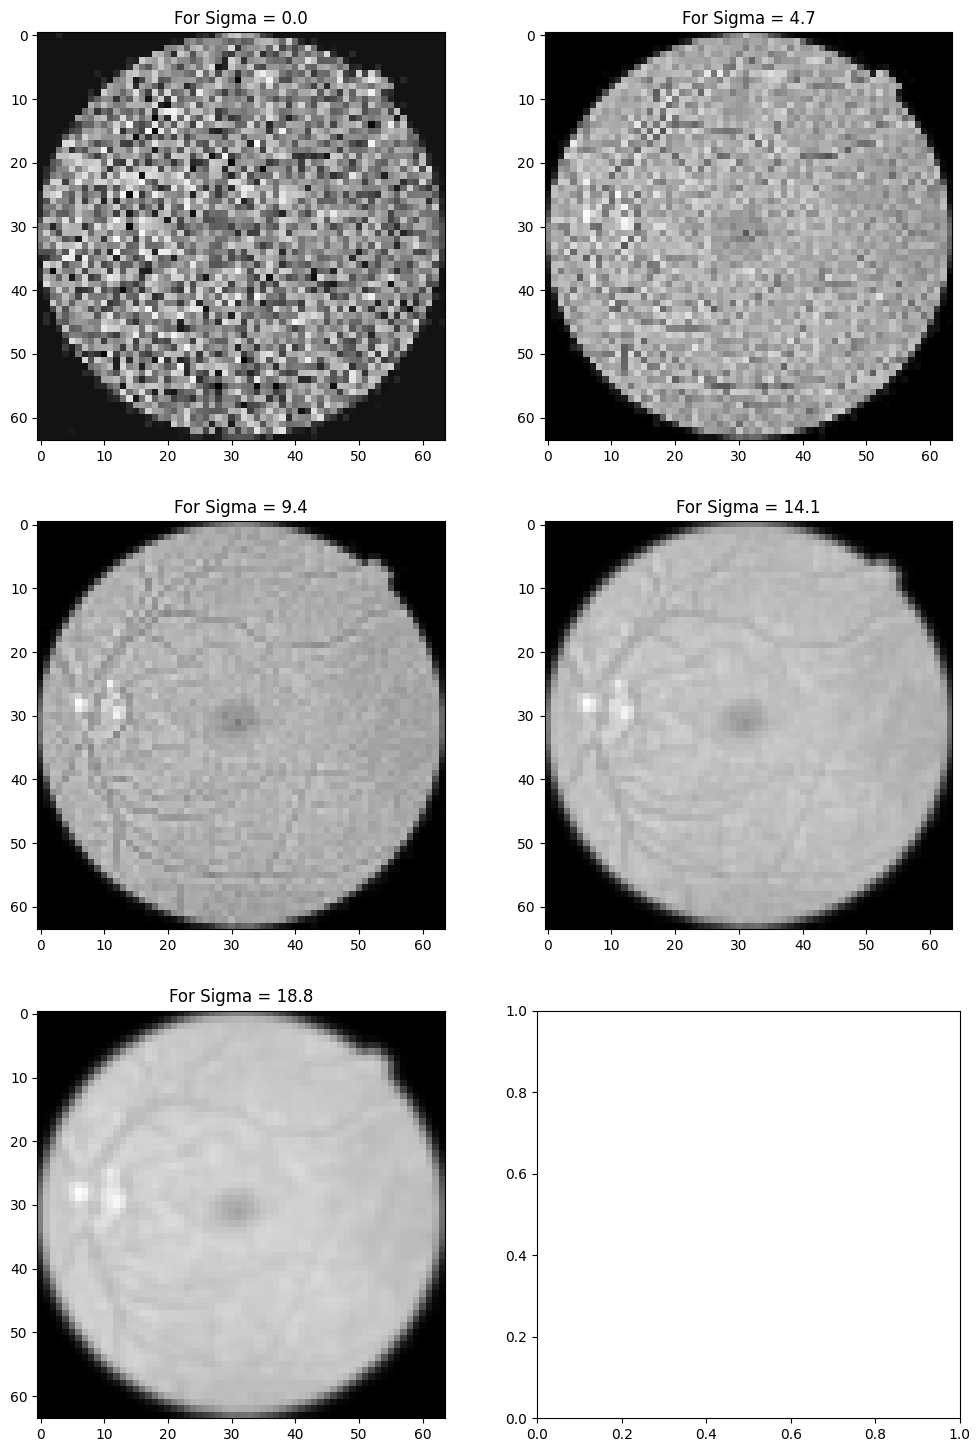

In [48]:
## Put you code below

# 1. compute scale factor
print("image shape: ", img.shape)
original_dim = img.shape[0]  # assuming square image, # img.shape -> (height, width)
reduced_dim = 64

scale_factor = np.sqrt(original_dim / reduced_dim)
print("scale factor: ", scale_factor)


fig, ax = plt.subplots(3,2, figsize=(12, 18))
ax = ax.flatten()

# 2. apply gaussian filter, resize image to (64,64)
for s in range(5):
    sigma = s * scale_factor
    retina_decimated = resize(skfilters.gaussian(retina_gray_scale_equalized, sigma=sigma), (64,64), anti_aliasing=False)
    # 3. display image with title for sigma value
    ax[s].set_title('For Sigma = ' + str(round(sigma, 1)))
    _=ax[s].imshow(retina_decimated, cmap=plt.get_cmap('gray'))

> Answer the following questions.   
> 1. How does the aliasing change with increasing sigma, decreasing bandwidth? Is this the behavior you expect and why?  
> 2. How does the blurring of the image change with increasing sigma, decreasing bandwidth? Is this the behavior you expect and why?    
> **End of exercise.**

> **Answers:**   
> 1. With an increase in sigma and decreasing bandwidth, the more low frequencies pass and more high frequencies are removed (low pass filtering), meaning that there is less aliasing and more blur to the image. We can see that for a sigma of 0, there is no low pass filtering yet so there is alot of aliasing with jagged edges and noise but as we increase the sigma (thus decreasing the bandwidth for how much high frequencies can pass), the Gaussian filter removed more of the high frequency components before resizing, which removes frequencies above the Nyquist limit.        
> 2. As sigma increases, there is more blur, because it surpresses noise and fine details because the bigger sigma is the more high frequencies are removed. At very large sigma values, even the mid-sized frequencies are removed, blurring details like the veins in the retina image. This is expected because the higher sigma is, the lower the cutoff frequecy is (so less frequencies are retained thus less detail).          

#### Copyright 2021, 2022, 2023, 2024, 2025, 2026, Stephen F Elston. All rights reserved. 